In [1]:
from xclib.data import data_utils
import pandas as pd
from numpy import *
import numpy as np
import copy
import statistics
import matplotlib.pyplot as plt

In [2]:
def read_labels(f_name):
    f = pd.read_csv(f_name, header = None,  encoding='ISO-8859-1') 
    f = f.to_numpy() 
    return f

In [3]:
Y_test = read_labels('/home/shreya/Sem6/COL774/A3/virus/ass3_parta_data/test_y.txt')
Y_train = read_labels('/home/shreya/Sem6/COL774/A3/virus/ass3_parta_data/train_y.txt')

In [4]:
x_test = data_utils.read_sparse_file('/home/shreya/Sem6/COL774/A3/virus/ass3_parta_data/test_x.txt', force_header=True)
x_train = data_utils.read_sparse_file('/home/shreya/Sem6/COL774/A3/virus/ass3_parta_data/train_x.txt', force_header=True)

/home/shreya/.local/lib/python3.6/site-packages/xclib-0.96-py3.6-linux-x86_64.egg/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


In [5]:
Y_valid = read_labels('/home/shreya/Sem6/COL774/A3/virus/ass3_parta_data/valid_y.txt')
x_valid = data_utils.read_sparse_file('/home/shreya/Sem6/COL774/A3/virus/ass3_parta_data/valid_x.txt', force_header=True)

In [6]:
f_size = x_train.shape[1]
print(f_size)
X_train = []
for i in range(x_train.shape[0]):
    l = x_train[i].toarray()
    X_train.append(l)
X_test = []
for i in range(x_test.shape[0]):
    l = x_test[i].toarray()
    X_test.append(l)    
X_valid = []
for i in range(x_valid.shape[0]):
    l = x_valid[i].toarray()
    X_valid.append(l)   

482


In [7]:
# #to get H_y
# p_y0 = 1.0
# p_y1 = 1.0
# for label in Y_train:
#     if(label==0):
#         p_y0 += 1.0

# p_y1 = len(Y_train) - p_y0
# print("p_y0 = ", p_y0)
# print("p_y1 = ", p_y1)
# print(len(Y_train))
# p_y0 = p_y0/(len(Y_train)+1)
# p_y1 = p_y1/(len(Y_train)+1)


# H_y = (-1)*p_y0*(np.log(p_y0)/np.log(2))
# H_y = H_y - p_y1*(np.log(p_y1)/np.log(2))
# print('H of y = ', H_y)

In [7]:
def feature_median(f_index, i_list, X):
    med_list = []
    if len(i_list)==0:
        return -1
    for i in i_list:
        temp = X[i]
        med_list.append(temp[0][f_index])
#     print(max(med_list))
    return median(med_list)

In [9]:
# print(X_train[1][0][0])
# print(X_train[2][0][0])
# print(X_train[4][0][0])
# print(X_train[5][0][0])

# print(Y_train[1])
# print(Y_train[2])
# print(Y_train[3])
# print(Y_train[4])

# feature_median(0,[1,2,4,5],X_train)

In [8]:
def H_entropy(i_list, Y):
    p0 = 0.0
    p1 = 0.0
    for i in i_list:
        if(Y[i]==1):
            p1 += 1.0
        else:
            p0 += 1.0
    if(p0==0 or p1==0):
        H = 0
    else:
        p0 = p0/(len(i_list)+2)
        p1 = p1/(len(i_list)+2)    
        H = -(p0*(np.log(p0)/np.log(2))) - (p1*(np.log(p1)/np.log(2))) 
        
#     print("p0 ", p0)
#     print("p1 ", p1)
    
#     print(H)
    return H

In [11]:
print(H_entropy([1,2,3,4], Y_train))
# f_med = feature_median(list(range(0,len(Y_train))), X_train)
# print(f_med)
# print(H_entropy(1, f_med, list(range(0,len(Y_train))), X_train))

0


In [9]:
def mutual_info(f_index, i_list, X, Y):
    
    f_median = feature_median(f_index, i_list, X)
#     median1 = feature_median(f_index, i1_list, X)
#     if f_median==0:
#         return 1000000, [], []
    f0_list = []
    f1_list = []
    
    for i in i_list:
        temp = X[i]
        if(temp[0][f_index]<=f_median):
            f0_list.append(i)
        else:
            f1_list.append(i)
    
#     print('med_feature: ', f_median)
#     print('med1: ',median1)
    if(len(f0_list)==0 or len(f1_list)==0):
        H_y_x =  100000
    else:
        H_y_x0 = H_entropy(f0_list, Y)
        H_y_x1 = H_entropy(f1_list, Y)    
    
        f0 = float(len(f0_list))/len(i_list)
        f1 = float(len(f1_list))/len(i_list)
        H_y_x = ((f0*H_y_x0) + (f1*H_y_x1))
    
    p0 = 0.0
    p1 = 0.0
    for i in i_list:
        if(Y[i]==1):
            p1 += 1.0
        else:
            p0 += 1.0
    if(p0>p1):
        predict = 0
    else:
        predict = 1
#     print('Entropy of y given x is = ', H_y_x)
    return H_y_x, f0_list, f1_list, f_median, predict

In [10]:
#find best feature
def best_feature(i_list, X, Y):
    best_f = 0
    best_med = 0
    best_predict = 0
    min_entropy = 1000000
    f0_best = []
    f1_best = []
    
#     i0_list = []
#     i1_list = []
    
#     #to calculate H(y)
#     for i in i_list:
#         if(Y[i]==0):
#             i0_list.append(i)
#         else:
#             i1_list.append(i)
            
#     p_y0 = float(len(i0_list)+1)/(len(Y)+2)
#     p_y1 = float(len(i1_list)+1)/(len(Y)+2)
    
#     H_y = (p_y0*(np.log(1/p_y0)/np.log(2))) + (p_y1*(np.log(1/p_y1)/np.log(2)))  
    
    for i in range(f_size):
#         if parent_list[i]==0:
        val, f0, f1, med_temp, predict = mutual_info(i, i_list, X, Y)
        if (min_entropy>val):
            min_entropy = val
            best_f = i
            f0_best = f0
            f1_best = f1
            best_med = med_temp
            best_predict = predict
#     print(H_y-)
#     median_val = feature_median(best_f, i_list, X)
    return best_f, best_med, f0_best, f1_best, best_predict

In [21]:
# print(best_feature(list(range(0,len(Y_train))), X_train, Y_train))

In [11]:
class Node:
    def __init__(self, feature, median, height, max_predict):
        self.left = None
        self.right = None
        self.feature = feature
        self.median = median
        self.height = height
#         self.parent = parent_list
        self.max_predict = max_predict
    def insert_left(self, node):
        if self.left is None:
            self.left = node
    
    def insert_right(self, node):
        if self.right is None:
            self.right = node  

In [12]:
def make_tree(i_list, X, Y, height):
    if(height==0 or len(i_list)==0):
        case0 = 0
        case1 = 0
        for i in i_list:
            if Y[i]==0:
                case0 += 1
            else:
                case1 += 1
        if case0 > case1:
            return 0
        else:
            return 1
    else:
        feature, f_median, f0_list, f1_list, max_predict = best_feature(i_list, X, Y)
        f_node = Node(feature, f_median, height, max_predict)
#         parent_list[feature] = 1
        print("At height: ", height, " feature: ", feature, " f_median: ", f_median)
        left_node = make_tree(f0_list, X, Y, height-1)
        right_node = make_tree(f1_list, X, Y, height-1)
        f_node.insert_left(left_node)
        f_node.insert_right(right_node)        
        return f_node

In [13]:
print(len(X_valid))

21572


In [14]:
def decision_tree(dTree, x):
    node = dTree
    while(type(node)!=int):
        if(x[node.feature] > node.median): 
            node = node.right
        else:
            node = node.left
#     if(x[node.feature] > node.median):
#         return node.right
#     else:
#         return node.left
    return node

In [15]:
def get_accuracy(X_test, Y_test, dtree):
    accuracy = 0.0
    for i in range(len(Y_test)):
        predict = decision_tree(dtree, X_test[i][0])
        if (predict==Y_test[i]):
            accuracy += 1.0
    accuracy = accuracy/(len(Y_test))
    print("Accuracy is: ", accuracy)
    return accuracy

In [16]:
#define decision tree:
Tree_list = []
h = 20
height = h
i_list = range(0, len(Y_train))
#     parent_list = np.zeros(f_size)
Tree = make_tree(i_list, X_train, Y_train, height)
Tree_list.append(Tree)
#     val_acc.append(get_accuracy(X_valid, Y_valid, Tree))
#     test_acc.append(get_accuracy(X_test, Y_test, Tree))    

At height:  20  feature:  217  f_median:  0.0
At height:  19  feature:  252  f_median:  0.0
At height:  18  feature:  57  f_median:  0.0
At height:  17  feature:  401  f_median:  0.0
At height:  16  feature:  61  f_median:  1.0
At height:  15  feature:  83  f_median:  0.0
At height:  14  feature:  206  f_median:  0.0
At height:  13  feature:  239  f_median:  0.0
At height:  12  feature:  5  f_median:  0.0
At height:  11  feature:  245  f_median:  2.0
At height:  10  feature:  109  f_median:  0.0
At height:  9  feature:  93  f_median:  0.0
At height:  8  feature:  391  f_median:  0.0
At height:  7  feature:  27  f_median:  0.0
At height:  6  feature:  151  f_median:  0.0
At height:  5  feature:  355  f_median:  0.0
At height:  4  feature:  121  f_median:  0.0
At height:  3  feature:  375  f_median:  0.0
At height:  2  feature:  100  f_median:  0.0
At height:  1  feature:  106  f_median:  0.0
At height:  1  feature:  20  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height

At height:  2  feature:  359  f_median:  0.0
At height:  1  feature:  87  f_median:  2.0
At height:  1  feature:  0  f_median:  0.5
At height:  2  feature:  15  f_median:  3.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  22  f_median:  4.0
At height:  2  feature:  84  f_median:  18.0
At height:  1  feature:  141  f_median:  336.0
At height:  1  feature:  19  f_median:  9.0
At height:  2  feature:  19  f_median:  12.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  191  f_median:  0.0
At height:  6  feature:  106  f_median:  0.0
At height:  5  feature:  204  f_median:  0.0
At height:  4  feature:  80  f_median:  0.0
At height:  3  feature:  61  f_median:  0.0
At height:  2  feature:  232  f_median:  0.0
At height:  1  feature:  27  f_median:  0.0
At height:  1  feature:  90  f_median:  0.0
At height:  2  feature:  100

At height:  2  feature:  84  f_median:  4.0
At height:  1  feature:  121  f_median:  1.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  780.5
At height:  2  feature:  20  f_median:  333.0
At height:  1  feature:  20  f_median:  278.0
At height:  1  feature:  20  f_median:  572.5
At height:  2  feature:  20  f_median:  2053.0
At height:  1  feature:  20  f_median:  942.0
At height:  1  feature:  20  f_median:  2377.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  71  f_median:  0.0
At height:  6  feature:  11

At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  15  f_median:  1.0
At height:  1  feature:  2  f_median:  199.0
At height:  2  feature:  67  f_median:  31.0
At height:  1  feature:  114  f_median:  0.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  181  f_median:  0.0
At height:  3  feature:  182  f_median:  0.0
At height:  2  feature:  79  f_median:  0.0
At height:  1  feature:  93  f_median:  1.0
At height:  1  feature:  15  f_median:  3.0
At height:  2  feature:  107  f_median:  566.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  1.0
At height:  2  feature:  151  f_median:  81.0
At height:  1  feature:  209  f_median:  35.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  20  

At height:  2  feature:  87  f_median:  2.0
At height:  1  feature:  354  f_median:  21.5
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  34  f_median:  2.0
At height:  2  feature:  87  f_median:  2.0
At height:  1  feature:  118  f_median:  273.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  22  f_median:  0.0
At height:  5  feature:  15  f_median:  2.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0

At height:  3  feature:  20  f_median:  1697.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  20  f_median:  3644.0
At height:  3  feature:  20  f_median:  3580.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  36  f_median:  0.0
At height:  6  feature:  19  f_median:  1.0
At height:  5  feature:  24  f_median:  1.0
At height:  4  feature:  56  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median: 

At height:  8  feature:  5  f_median:  1.0
At height:  7  feature:  100  f_median:  0.0
At height:  6  feature:  375  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  47  f_median:  29.0
At height:  6  feature:  5  f_median:  3.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At he

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  20  f_median:  4373.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At heig

At height:  9  feature:  19  f_median:  8.0
At height:  8  feature:  27  f_median:  24.0
At height:  7  feature:  27  f_median:  22.0
At height:  6  feature:  0  f_median:  5.5
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  9.0
At height:  4  feature:  0  f_median:  9.0
At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height:  6  feature:  0  f_median:  9.0
At height:  5  feature:  0  f_median:  9.0
At height:  4  feature:  0  f_median:  9.0
At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height:  7  feature:  27  f_median:  33.0
At height:  6  feature:  0  f_median:  9.0
At height:  5  feature:  0  f_median:  9.0
At h

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  151  f_median:  13.5
At height:  7  feature:  34  f_median:  0.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  15  f_median:  1.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At hei

At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  2  f_median:  6483.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At heigh

At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  19  f_median:  5.0
At height:  8  feature:  22  f_median:  6.0
At height:  7  feature:  48  f_median:  0.0
At height:  6  feature:  71  f_median:  9.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At heig

At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  2  f_median:  44024.5
At height:  9  feature:  2  f_median:  36888.0
At height:  8  feature:  2  f_median:  0.0
At height:  7  feature:  19  f_median:  0.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0


At height:  6  feature:  111  f_median:  0.0
At height:  5  feature:  357  f_median:  4.0
At height:  4  feature:  187  f_median:  0.0
At height:  3  feature:  93  f_median:  2.0
At height:  2  feature:  232  f_median:  5.0
At height:  1  feature:  209  f_median:  2.0
At height:  1  feature:  19  f_median:  0.0
At height:  2  feature:  19  f_median:  1.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  19  f_median:  35.0
At height:  3  feature:  20  f_median:  24.0
At height:  2  feature:  20  f_median:  20.5
At height:  1  feature:  20  f_median:  19.0
At height:  1  feature:  20  f_median:  21.5
At height:  2  feature:  20  f_median:  30.0
At height:  1  feature:  20  f_median:  26.5
At height:  1  feature:  20  f_median:  52.5
At height:  4  feature:  375  f_median:  0.0
At height:  3  feature:  100  f_median:  0.0
At height:  2  feature:  165  f_median:  0.0
At height:  1  feature:  354  f_median:  10.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  f

At height:  2  feature:  5  f_median:  0.0
At height:  1  feature:  6  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  8  f_median:  0.0
At height:  6  feature:  15  f_median:  8.5
At height:  5  feature:  15  f_median:  2.5
At height:  4  feature:  0  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  15  f_median:  6.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At heigh

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  27  f_median:  390.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  27  f_median:  70.0
At height:  5  feature:  67  f_median:  1.0
At height:  4  feature:  0  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At he

At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  9  feature:  165  f_median:  0.0
At height:  8  feature:  154  f_median:  2.0
At height:  7  feature:  189  f_median:  0.0
At height:  6  feature:  375  f_median:  0.0
At height:  5  feature:  90  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At

At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  27  f_median:  125.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  153  f_median:  0.0
At height:  7  feature:  161  f_median:  0.0
At height:  6  feature:  15  f_median:  0.0
At height:  5  feature:  36  f_median:  2.0
At height:  4  feature:  107  f_median:  36.0
At height:  3  feature:  141  f_median:  4.0
At height:  2  feature:  20  f_median:  0.0
At height:  1  feature:  80  f_median:  12.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  142  f_median:  95.0
At height:  1  feature:  3  f_medi

At height:  5  feature:  80  f_median:  1.5
At height:  4  feature:  71  f_median:  20.5
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  24  f_median:  3.0
At height:  5  feature:  71  f_median:  20.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At he

At height:  3  feature:  15  f_median:  9.0
At height:  2  feature:  15  f_median:  3.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  15  f_median:  6.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  3.5
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  6  feature:  15  f_median:  51.0
At height:  5  feature:  15  f_median:  27.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At h

At height:  5  feature:  20  f_median:  5699.0
At height:  4  feature:  20  f_median:  4883.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  1.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At 

At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  2  f_median:  43031.0
At height:  8  feature:  2  f_median:  28174.0
At height:  7  feature:  2  f_median:  14087.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0

At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  13  feature:  359  f_median:  0.0
At height:  12  feature:  151  f_median:  485.0
At height:  11  feature:  119  f_median:  0.0
At height:  10  feature:  80  f_median:  56463.0
At height:  9  feature:  15  f_median:  2.0
At height:  8  feature:  19  f_median:  9.0
At height:  7  feature:  20  f_median:  1.0
At height:  6  feature:  34  f_median:  43.0
At height:  5  feature:  61  f_m

At height:  1  feature:  80  f_median:  62178.0
At height:  1  feature:  20  f_median:  0.5
At height:  2  feature:  80  f_median:  62360.5
At height:  1  feature:  80  f_median:  62281.5
At height:  1  feature:  80  f_median:  62420.0
At height:  6  feature:  80  f_median:  65157.5
At height:  5  feature:  80  f_median:  63935.0
At height:  4  feature:  80  f_median:  63100.5
At height:  3  feature:  80  f_median:  62774.5
At height:  2  feature:  80  f_median:  62532.0
At height:  1  feature:  80  f_median:  62466.0
At height:  1  feature:  80  f_median:  62674.0
At height:  2  feature:  20  f_median:  0.0
At height:  1  feature:  80  f_median:  62887.0
At height:  1  feature:  80  f_median:  62889.0
At height:  3  feature:  80  f_median:  63639.0
At height:  2  feature:  20  f_median:  0.0
At height:  1  feature:  80  f_median:  63552.0
At height:  1  feature:  80  f_median:  63399.0
At height:  2  feature:  80  f_median:  63715.0
At height:  1  feature:  100  f_median:  0.0
At heig

At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  80  f_median:  85636.0
At height:  6  feature:  80  f_median:  80414.0
At height:  5  feature:  20  f_median:  1.0
At height:  4  feature:  80  f_median:  78483.0
At height:  3  feature:  80  f_median:  77221.0
At height:  2  feature:  80  f_median:  76201.0
At height:  1  feature:  80  f_median:  76097.0
At height:  1  feature:  80  f_median:  76610.5
At height:  2  feature:  80  f_median:  78143.0
At height:  1  feature:  80  f_median:  78012.0
At height:  1  feature:  80  f_median:  78301.5
At height:  3  feature:  80  f_median:  79604.5
At height:  2  feature:  80  f_median:  78806.0
At height:  1  feature:  80  f_median:  78762.0
At height:  1  feature:  80  f_median:  79599.5
At height:  2  feature:  80  f_median:  80052.0
At height:  1  feature:  80  f_median:  79785.0
At height:  1  feature:  52  f_median:  2.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  

At height:  6  feature:  80  f_median:  70391.0
At height:  5  feature:  80  f_median:  62985.0
At height:  4  feature:  80  f_median:  60354.5
At height:  3  feature:  80  f_median:  58903.0
At height:  2  feature:  80  f_median:  58481.5
At height:  1  feature:  80  f_median:  57955.0
At height:  1  feature:  20  f_median:  0.0
At height:  2  feature:  80  f_median:  59399.0
At height:  1  feature:  80  f_median:  59228.0
At height:  1  feature:  80  f_median:  59949.0
At height:  3  feature:  151  f_median:  491.0
At height:  2  feature:  20  f_median:  0.5
At height:  1  feature:  80  f_median:  62798.0
At height:  1  feature:  80  f_median:  62235.0
At height:  2  feature:  80  f_median:  62519.0
At height:  1  feature:  80  f_median:  60945.0
At height:  1  feature:  20  f_median:  0.5
At height:  4  feature:  80  f_median:  67620.0
At height:  3  feature:  80  f_median:  64137.0
At height:  2  feature:  80  f_median:  63681.5
At height:  1  feature:  20  f_median:  0.0
At height

At height:  3  feature:  80  f_median:  86902.0
At height:  2  feature:  80  f_median:  84624.5
At height:  1  feature:  80  f_median:  83890.0
At height:  1  feature:  80  f_median:  86123.0
At height:  2  feature:  80  f_median:  93804.0
At height:  1  feature:  80  f_median:  87480.0
At height:  1  feature:  20  f_median:  0.5
At height:  6  feature:  20  f_median:  2.0
At height:  5  feature:  80  f_median:  59169.5
At height:  4  feature:  80  f_median:  43391.5
At height:  3  feature:  80  f_median:  40913.0
At height:  2  feature:  80  f_median:  40098.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  80  f_median:  48434.0
At height:  2  feature:  80  f_median:  46506.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_media

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  80  f_median:  51298.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  20  f_median:  0.5
At height:  3  feature:  80  f_median:  51863.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  80  f_median:  51911.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  20  f_median:  0.5
At height:  5  feature:  80  f_median:  55513.0
At height:  4  feature:  80  f_m

At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  80  f_median:  75879.5
At height:  4  feature:  80  f_median:  75376.0
At height:  3  feature:  80  f_median:  74715.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  0.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  80  f_median:  77128.0
At height:  3  feature:  80  f_median:  76351.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  0.5
At height:  2  feature:  0 

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  27  f_median:  58.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height

At height:  3  feature:  0  f_median:  8.0
At height:  2  feature:  0  f_median:  8.0
At height:  1  feature:  0  f_median:  8.0
At height:  8  feature:  15  f_median:  2.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  8  f_median:  0.5
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:

At height:  1  feature:  20  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  22  f_median:  4.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  43  f_median:  4.0
At height:  3  feature:  27  f_median:  0.0
At height:  2  feature:  23  f_median:  0.0
At height:  1  feature:  36  f_median:  1.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  15  f_median:  0.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  67  f_median:  1.0
At height:  2  feature:  43  f_median:  6.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  146  f_median:  9.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0


At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  8  f_median:  0.0
At height:  2  feature:  391  f_median:  0.0
At height:  1  feature:  151  f_median:  1.5
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  2  f_median:  0.0
At height:  2  feature:  12  f_median:  0.0
At height:  1  feature:  15  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  5  f_median:  0.0
At height:  4  feature:  15  f_median:  0.0
At height:  3  feature:  24  f_median:  37.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At

At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  5  f_median:  2862.0
At height:  7  feature:  5  f_median:  2149.0
At height:  6  feature:  5  f_median:  1927.0
At height:  5  feature:  5  f_median:  1752.0
At height:  4  feature:  5  f_median:  1662.0
At height:  3  feature:  5  f_median:  1607.0
At height:  2  feature:  5  f_median:  1325.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  5  f_median:  1714.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  5  f_median:  1859.0
At height:  3  feature:  5  f_median:  1795.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature: 

At height:  3  feature:  5  f_median:  5252.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  240  f_median:  2.0
At height:  9  feature:  203  f_median:  31.0
At height:  8  feature:  27  f_median:  0.0
At height:  7  feature:  182  f_median:  0.0
At height:  6  feature:  114  f_median:  0.0
At height:  5  feature:  79  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  90  f_median:  0.0
At height:  2  feature:  154  f_median:  0.0
At height:  1  feature:  93  f_median:  1.0
At height:  1  feature:  8  f_median:  7.0
At height:  2  feature:  8  f_median:  0.0
At height:  1  feature:  15  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  19  f_median:  115.5
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_m

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  8  f_median:  0.0
At height:  3  feature:  9  f_median:  0.0
At height:  2  feature:  22  f_median:  6.0
At height:  1  feature:  24  f_median:  13.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  8  f_median:  0.0
At height:  4  feature:  15  f_median:  24.0
At height:  3  feature:  24  f_median:  74.0
At height:  2  feature:  15  f_median:  22.0
At height:  1  feature:  34  f_median:  14.0
At height:  1  feature:  27  f_median:  4.0
At height:  2  feature:  24  f_median:  76.0
At height:  1  feature:  27  f_median:  5.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  15  f_median:  28.0
At height:  2  feature:  15  f_median

At height:  2  feature:  19  f_median:  28.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  2  f_median:  98.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  2  f_median:  243.5
At height:  3  feature:  2  f_median:  191.5
At height:  2  feature:  2  f_median:  180.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  2  f_median:  201.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  2  f_median:  320.5
At height:  2  feature:  2  f_median:  291.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  2  f_median:  349.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  20  f_median:  5.0
At height:  6  feature:  19  f_media

At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  52  f_median:  0.0
At height:  6  feature:  193  f_median:  1.0
At height:  5  feature:  121  f_median:  25.0
At height:  4  feature:  173  f_median:  2.0
At height:  3  feature:  8  f_median:  0.0
At height:  2  feature:  67  f_median:  5.0
At height:  1  feature:  49  f_median:  1.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  2  f_median:  0.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
A

At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height: 

At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  5  f_median:  0.0
At height:  5  feature:  12  f_median:  0.5
At height:  4  feature:  15  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  15  f_median:  5.5
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At heigh

At height:  2  feature:  5  f_median:  4.0
At height:  1  feature:  49  f_median:  60.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  34  f_median:  5.0
At height:  2  feature:  101  f_median:  0.0
At height:  1  feature:  32  f_median:  0.0
At height:  1  feature:  8  f_median:  10.0
At height:  2  feature:  5  f_median:  4.0
At height:  1  feature:  15  f_median:  0.0
At height:  1  feature:  5  f_median:  167.0
At height:  5  feature:  20  f_median:  106.0
At height:  4  feature:  20  f_median:  104.0
At height:  3  feature:  20  f_median:  103.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  19  f_median:  11.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_med

At height:  2  feature:  446  f_median:  0.0
At height:  1  feature:  100  f_median:  1.0
At height:  1  feature:  83  f_median:  4.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  36  f_median:  1.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  19  f_median:  27.0
At height:  4  feature:  49  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At

At height:  3  feature:  0  f_median:  0.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  68  f_median:  3.0
At height:  5  feature:  83  f_median:  1.0
At height:  4  feature:  71  f_median:  177.0
At height:  3  feature:  27  f_median:  8.0
At height:  2  feature:  9  f_median:  0.0
At height:  1  feature:  15  f_median:  12.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  19  f_median:  1.0
At height:  2  feature:  20  f_median:  3.0
At height:  1  feature:  15  f_median:  12.5
At height:  1  feature:  0  f_median:  3.0
At height:  2  feature:  15  f_median:  12.5
At height:  1  feature:  0  f_median:  3

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  15  f_median:  1.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  151  f_median:  63.0
At height:  6  feature:  182  f_median:  0.0
At height:  5  feature:  209  f_median:  20.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  5  f_median:  0.0
At height:  2  feature:  19  f_median:  16.0
At height:  1  feature:  8  f_median:  0.5
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  5  f_median:  5.0


At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  2  f_median:  2873.0
At height:  5  feature:  2  f_median:  1177.0
At height:  4  feature:  2  f_median:  195.0
At height:  3  feature:  2  f_median:  120.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  2  f_median:  2114.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  2  f_median:  4005.0
At height:  4  feature:  2  f_median:  3884.5
At height:  3  feature:  2  f_median:  3493.5
At height:  2  feature:  0  f_me

At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  13  feature:  36  f_median:  2.0
At height:  12  feature:  375  f_median:  0.0
At height:  11  feature:  364  f_median:  0.0
At height:  10  feature:  242  f_median:  0.0
At height:  9  feature:  151  f_median:  23.0
At height:  8  feature:  190  f_median:  0.0
At height:  7  feature:  100  f_median:  0.0
At height:  6  feature:  353  f_median:  1.0
At height:  5  feature:  232  f_median:  9.0
At height:  4  feature:  33  f_median:  0.0
At height:  3  feature:  173  f_median:  0.0
At height:  2  feature:  71  f_median:  1.0
At height:  1  feature:  90  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0 

At height:  4  feature:  15  f_median:  1.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  178  f_median:  3.0
At height:  7  feature:  361  f_median:  1.0
At height:  6  feature:  472  f_median:  0.0
At height:  5  feature:  193  f_median:  0.0
At height:  4  feature:  87  f_median:  2.0
At height:  3  feature:  47  f_median:  0.0
At height:  2  feature:  90  f_median:  0.0
At height:  1  feature:  34  f_median:  25.0
At height:  1  feature:  24  f_median:  9.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  15  f_median:  0.0
At height:  1  feature:  19  f_median:  27.0
At height:  1  feature:  19  f_median:  1.5
At height:  2  feature:  0  f_media

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  20  f_median:  0.0
At height:  7  feature:  141  f_median:  8.0
At height:  6  feature:  215  f_median:  0.0
At height:  5  feature:  359  f_median:  0.0
At height:  4  feature:  203  f_median:  3.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  52  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  67  f_median:  2.0
At height:  4  feature:  0  f_median:  0.0


At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  15  f_median:  4.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  15  f_median:  1.0
At height:  4  feature:  15  f_median:  0.0
At height:  3  feature:  19  f_median:  27.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At hei

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  19  f_median:  2.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:

At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  84  f_median:  23.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  20  f_median:  0.0
At height:  6  feature:  87  f_median:  2.0
At height:  5  feature:  12  f_median:  0.0
At height:  4  feature:  151  f_median:  293.0
At height:  3  feature:  84  f_median:  28.0
At height:  2  feature:  151  f_median:  290.0
At height:  1  feature:  151  f_median:  288.0
At height:  1  feature:  151  f_median:  292.0
At height:  2  feature:  115  f_median:  20.0
At height:  1  feature:  151  f_median:  275.0
At height:  1  feature:  151  f_median:  292.5
At height:  3  feature:  151  f_median:  297.0
At height:  2  feature:  151  f_median:  295.0
At height:  1  feature:  151  f_median:  294.0
At heigh

At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  151  f_median:  320.0
At height:  7  feature:  151  f_median:  317.0
At height:  6  feature:  151  f_median:  315.0
At height:  5  feature:  151  f_median:  314.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median: 

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  15  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  12  f_median:  0.0
At height:  6  feature:  20  f_median:  0.0
At height:  5  feature:  24  f_median:  16.0
At height:  4  feature:  107  f_median:  320.0
At height:  3  feature:  24  f_median:  12.0
At height:  2  feature:  107  f_median:  316.0
At height:  1  feature:  141  f_median:  288.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  141  f_median:  727.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  107  f_median:  326.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  24  f_median:  18.0
At height:  3  feature:  

At height:  4  feature:  24  f_median:  7.0
At height:  3  feature:  36  f_median:  4.0
At height:  2  feature:  80  f_median:  314.0
At height:  1  feature:  80  f_median:  272.0
At height:  1  feature:  80  f_median:  324.0
At height:  2  feature:  80  f_median:  2259.0
At height:  1  feature:  36  f_median:  9.5
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  24  f_median:  7.0
At height:  4  feature:  80  f_median:  2110.0
At height:  3  feature:  80  f_median:  1883.0
At height:  2  feature:  80  f_median:  1530.0
At height:  1  feature:  80  f_median:  1525.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  80  f_median:  2086.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  80  f_median:  2160.0
At height:  2  feature:  80  f_median:  2156.0
At height

At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  4  feature:  24  f_median:  11.5
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  5  feature:  0  f_median:  10.0
At height:  4  feature:  0  f_median:  10.0
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  6  feature:  121  f_median:  40.0
At height:  5  feature:  80  f_median:  407.0
At height:  4  feature:  24  f_median:  12.0
At height:  3  feature:  355  f_median:  19.0
At height:  2  feature:  87  f_median:  6.0
At height:  1  feature:  36  f_median:  4.5
At height:  1  feature:  19  f_median:  23.0
At height:  2  feature:

At height:  3  feature:  20  f_median:  28.5
At height:  2  feature:  151  f_median:  85.0
At height:  1  feature:  107  f_median:  499.0
At height:  1  feature:  84  f_median:  68.0
At height:  2  feature:  84  f_median:  68.0
At height:  1  feature:  20  f_median:  30.5
At height:  1  feature:  20  f_median:  31.0
At height:  4  feature:  20  f_median:  113.5
At height:  3  feature:  20  f_median:  112.0
At height:  2  feature:  20  f_median:  101.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  115.0
At height:  2  feature:  20  f_median:  114.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  20  f_median:  26.0
At height:  4  feature:  20  f_median:  25.5
At height:  3  fea

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  203  f_median:  149.5
At height:  5  feature:  0  f_median:  0.5
At height:  4  feature:  8  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  1.5
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  151  f_median:  85.5
At height:  4  feature:  210  f_median:  22.5
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
A

At height:  4  feature:  12  f_median:  0.0
At height:  3  feature:  2  f_median:  38.5
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  7  feature:  358  f_median:  1.0
At height:  6  feature:  354  f_median:  121.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  15  f_median:  3.0
At height:  3  feature:  19  f_median:  76.0
At height:  2  feature:  22  f_median:  9.0
At height:  1  feature:  64  f_median:  2.0
At height:  1  feature:  19  f_median:  75.0
At height:  2  feature:  19  f_median:  78.0
At height:  1  feature:  22  f_median:  15.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  15  f_median:  15.0
At height:  2  feature:  15  f_median:  8.0
At height:  1  feature:  15  f_m

At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  109  f_median:  0.0
At height:  5  feature:  48  f_median:  0.0
At height:  4  feature:  107  f_median:  152.0
At height:  3  feature:  22  f_median:  8.0
At height:  2  feature:  2  f_median:  0.0
At height:  1  feature:  5  f_median:  4.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  67  f_median:  19.0
At height:  1  feature:  4  f_median:  0.0
At height:  1  feature:  19  f_median:  41.0
At height:  3  feature:  87  f_median:  4.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  8  f_median:  0.0
At height:  1  feature:  15  f_median:  7.5
At height:  2  feature:  23  f_median:  0.0
At height:  1  feature:  2  f_median:  0.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  24  f_median:  104.0
At height:  3  feature:  24  f_median:  103.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_med

At height:  4  feature:  107  f_median:  300.0
At height:  3  feature:  141  f_median:  61.0
At height:  2  feature:  208  f_median:  6.0
At height:  1  feature:  83  f_median:  1654.0
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  5  f_median:  2.0
At height:  5  feature:  24  f_median:  232.0
At height:  4  feature:  27  f_median:  1116.5
At height:  3  feature:  27  f_median:  484.5
At height:  2  feature:  20  f_median:  0.5
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  27  f

At height:  1  feature:  107  f_median:  85.5
At height:  1  feature:  141  f_median:  879.0
At height:  3  feature:  141  f_median:  863.0
At height:  2  feature:  107  f_median:  85.5
At height:  1  feature:  141  f_median:  859.0
At height:  1  feature:  20  f_median:  43.5
At height:  2  feature:  20  f_median:  43.0
At height:  1  feature:  20  f_median:  42.5
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  20  f_median:  54.0
At height:  4  feature:  20  f_median:  49.5
At height:  3  feature:  20  f_median:  47.0
At height:  2  feature:  141  f_median:  843.0
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  141  f_median:  835.0
At height:  1  feature:  107  f_median:  85.5
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  20  f_median:  51.0
At height:  2  feature:  107  f_median:  85.5
At height:  1  feature:  141  f_median:  838.0
At height:  1  feature:  141  f_median:  816.0


At height:  5  feature:  210  f_median:  22.0
At height:  4  feature:  107  f_median:  300.0
At height:  3  feature:  61  f_median:  207.0
At height:  2  feature:  141  f_median:  61.0
At height:  1  feature:  151  f_median:  539.0
At height:  1  feature:  24  f_median:  182.5
At height:  2  feature:  151  f_median:  553.5
At height:  1  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  4  feature:  61  f_median:  207.0
At height:  3  feature:  151  f_median:  545.0
At height:  2  feature:  24  f_median:  182.5
At height:  1  feature:  151  f_median:  533.5
At height:  1  feature:  151  f_median:  536.0
At height:  2  feature:  151  f_median:  550.0
At height:  1  feature:  151  f_median:  548.0
At height:  1  feature:  24  f_median:  182.0
At height:  3  feature:  24  f_median:  182.5
At height:  2  feature:  0  f_median:  4.

At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  7  feature:  80  f_median:  59.0
At height:  6  feature:  83  f_median:  1653.0
At height:  5  feature:  209  f_median:  189.0
At height:  4  feature:  107  f_median:  300.0
At height:  3  feature:  61  f_median:  209.0
At height:  2  feature:  209  f_median:  187.0
At height:  1  feature:  151  f_median:  577.0
At height:  1  feature:  141  f_median:  61.0
At height:  2  feature:  80  f_median:  58.0
At height:  1  feature:  151  f_median:  578.0
At height:  1  feature:  151  f_median:  581.5
At height:  3  feature:  61  f_median:  209.0
At height:  2  feature:  209  f_median:  188.5
At height:  1  feature:  151  f_median:  580.0
At height:  1  feature:  5  f_median:  3.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  4  feature:  25  f_median:  6.0
At height:  3  feature:  151  f_median:  585.0
At height:  2  feature:  107  f_median:  30

At height:  5  feature:  19  f_median:  363.5
At height:  4  feature:  19  f_median:  274.5
At height:  3  feature:  20  f_median:  3798.0
At height:  2  feature:  20  f_median:  3708.5
At height:  1  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  20  f_median:  3888.0
At height:  1  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  3  feature:  19  f_median:  282.0
At height:  2  feature:  20  f_median:  3489.0
At height:  1  feature:  20  f_median:  3396.5
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  4  feature:  20  f_median:  3721.0
At height:  3  feature:  20  f_median:  3623.0
At height:  2  feature:  20  f_median:  3151.0
At height:  1  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  20  f_median:  3687.0
At height:  1  feature:  0  f_median:  4.0
At height

At height:  1  feature:  24  f_median:  589.5
At height:  2  feature:  19  f_median:  64.0
At height:  1  feature:  20  f_median:  6.0
At height:  1  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  15  f_median:  213.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  15  f_median:  2.0
At height:  6  feature:  20  f_median:  0.0


At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  5  f_median:  30.0
At height:  7  feature:  8  f_median:  6.0
At height:  6  feature:  20  f_median:  10.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At heigh

At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  27  f_median:  32.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  10  feature:  201  f_median:  0.0
At height:  9  feature:  23  f_median:  0.0
At height:  8  feature:  8  f_median:  0.0
At height:  7  feature:  164  f_median:  0.0
At height:  6  feature:  359  f_median:  3.0
At height:  5  feature:  27  f_median:  1.0
At height:  4  feature:  153  f_median:  0.

At height:  5  feature:  207  f_median:  3.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  90  f_median:  1.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At heigh

At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  20  f_median:  221.0
At height:  5  feature:  20  f_median:  188.5
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  20  f_median:  134.0
At height:  6  feature:  20  f_median:  120.0
At height:  5  feature:  5  f_median:  3.0
At height:  4  feature:  20  f_median:  98.0
At height:  3  feature:  0  f_median:  2

At height:  1  feature:  0  f_median:  2.0
At height:  9  feature:  20  f_median:  164.0
At height:  8  feature:  20  f_median:  153.0
At height:  7  feature:  19  f_median:  151.0
At height:  6  feature:  20  f_median:  142.5
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  20  f_median:  163.0
At height:  6  feature:  20  f_median: 

At height:  6  feature:  20  f_median:  149.0
At height:  5  feature:  20  f_median:  145.5
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  20  f_median:  152.5
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  20  f_median:  178.0
At height:  6  feature:  20  f_median:  168.0
At height:  5  feature:  20  f_median:  161.5
At height:  4  feature:  0  f_median

At height:  3  feature:  68  f_median:  0.0
At height:  2  feature:  375  f_median:  0.0
At height:  1  feature:  19  f_median:  3.0
At height:  1  feature:  151  f_median:  113.5
At height:  2  feature:  19  f_median:  6.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  151  f_median:  115.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  203  f_median:  38.0
At height:  3  feature:  354  f_median:  16.0
At height:  2  feature:  88  f_median:  0.0
At height:  1  feature:  34  f_median:  2.0
At height:  1  feature:  19  f_median:  5.5
At height:  2  feature:  84  f_median:  2308.0
At height:  1  feature:  24  f_median:  13.5
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  5  f_median:  0.0
At height:  7  feature:  15  f_median:  0.0
At height:  6  feature:  19  f_median:  6.0
At height:  5  feature:  20  f_median:  44.0
At height:  4  feature:  20  f_median:  3.0
At height:  3  feature:  23  f_median:  0.0
At height:  2  feature:  34  f_median:  40.0
At height:  1  feature:  63  f_median:  0.0
At height:  1  feature:  63  f_median:  0.5
At height:  2  feature:  20  f_median:  1.0
At height:  1  feature:  34  f_median:  41.0
At height:  1  feature:  34  f_median:  41.0
At height:  3  feature:  20  f_median: 

At height:  2  feature:  19  f_median:  1.0
At height:  1  feature:  20  f_median:  1.5
At height:  1  feature:  20  f_median:  2.0
At height:  2  feature:  15  f_median:  0.0
At height:  1  feature:  19  f_median:  7.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  15  f_median:  3.5
At height:  2  feature:  19  f_median:  63.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  15  f_median:  5.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  8  f_median:  0.0
At height:  4  feature:  15  f_median:  1.0
At height:  3  feature:  15  f_median:  0.0
At height:  2  feature:  34  f_median:  34.0
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  20  f_median:  20.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  20  f_median:  29.0
At height:  5  feature:  36  f_median:  1907.0
At height:  4  feature:  36  f_median:  1690.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  36  f_median:  2487.5
At height:  3  feature:  0  f_median: 

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  251  f_median:  0.0
At height:  7  feature:  83  f_median:  1.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  4  f_median:  0.0
At height:  4  feature:  5  f_median:  4.0
At height:  3  feature:  12  f_median:  0.0
At height:  2  feature:  19  f_median:  46.0
At height:  1  feature:  19  f_median:  27.0
At height:  1  feature:  20  f_median:  273.0
At height:  2  feature:  20  f_median:  0.0
At height:  1  feature:  24  f_median:  106.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  15  f_median:  4.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median: 

At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  20  f_median:  273.0
At height:  4  feature:  20  f_median:  272.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  19  f_median:  220.0
At height:  6  feature:  20  f_median:  201.0
At height:  5  feature:  20  f_median:  19

At height:  7  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  10  feature:  27  f_median:  31.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  27  f_median:  27.5
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At hei

At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At heigh

At height:  1  feature:  151  f_median:  350.5
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  151  f_median:  351.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  151  f_median:  361.0
At height:  2  feature:  151  f_median:  358.0
At height:  1  feature:  209  f_median:  268.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  151  f_median:  364.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  209  f_median:  283.0
At height:  3  feature:  151  f_median:  363.0
At height:  2  feature:  151  f_median:  356.0
At height:  1  feature:  151  f_median:  353.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  22  f_median:  2.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  151  f_median:  456.5
At height:  2  feature:  151  f_median:  421.5
At he

At height:  5  feature:  67  f_median:  4.0
At height:  4  feature:  20  f_median:  0.0
At height:  3  feature:  84  f_median:  11.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  84  f_median:  8.0
At height:  2  feature:  181  f_median:  1.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  35.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  20  f_median:  0.0
At height:  4  feature:  49  f_median:  512.0
At height:  3  feature:  151  f_median: 

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  80  f_median:  1.0
At height:  7  feature:  151  f_median:  37.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At heig

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  80  f_median:  3.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At heigh

At height:  6  feature:  27  f_median:  1029.0
At height:  5  feature:  27  f_median:  1027.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  27  f_median:  2048.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  12  feature:  198  f_median:  1.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  100  f_median:  0.0
At height:  10  feature:  198  f_median:  1531.5
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  19  f_median:  5.0
At height:  8  feature:  20  f_median:  1.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  14  feature:  230  f_median:  0.0
At height:  13  feature:  190  f_median:  0.0
At height:  12  feature:  209  f_median:  4.0
At

At height:  7  feature:  84  f_median:  9.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  9  feature:  0  f_median:  3.0
At height:  8  feature:  0  f_median:  3.0
At height:

At height:  1  feature:  0  f_median:  4.0
At height:  6  feature:  15  f_median:  0.0
At height:  5  feature:  20  f_median:  1.0
At height:  4  feature:  100  f_median:  0.0
At height:  3  feature:  232  f_median:  1.0
At height:  2  feature:  121  f_median:  0.0
At height:  1  feature:  84  f_median:  29.0
At height:  1  feature:  19  f_median:  1.5
At height:  2  feature:  19  f_median:  1.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  19  f_median:  4.0
At height:  1  feature:  19  f_median:  0.5
At height:  1  feature:  22  f_median:  0.5
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  6  f_median:  0.0
At height:  2  feature:  19  f_median:  3.0
At height:  1  feature:  19  f_median:  1.5
At height:  1  feature:  19  f_median:  5.0
At height:  2  feature:  0  f_median

At height:  3  feature:  15  f_median:  2.0
At height:  2  feature:  19  f_median:  5.0
At height:  1  feature:  19  f_median:  3.0
At height:  1  feature:  19  f_median:  16.0
At height:  2  feature:  19  f_median:  1.0
At height:  1  feature:  20  f_median:  2.0
At height:  1  feature:  15  f_median:  4.0
At height:  3  feature:  15  f_median:  9.0
At height:  2  feature:  19  f_median:  6.0
At height:  1  feature:  19  f_median:  3.0
At height:  1  feature:  20  f_median:  45.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  20  f_median:  143.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median: 

At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  1.5
At height:  3  feature:  5  f_median:  0.0
At height:  2  feature:  8  f_median:  0.0
At height:  1  feature:  15  f_median:  4.5
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  19  f_median:  1.0
At height:  2  feature:  57  f_median:  8.0
At height:  1  feature:  24  f_median:  3.5
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  8.5
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  14.0
At height:  2  feature:  0  f_median:  14.0
At he

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  20  f_median:  3627.0
At height:  9  feature:  20  f_median:  3115.5
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At

At height:  2  feature:  22  f_median:  13.0
At height:  1  feature:  57  f_median:  7.5
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  15  f_median:  1.0
At height:  1  feature:  20  f_median:  2.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  190  f_median:  1.0
At height:  5  feature:  154  f_median:  1.0
At height:  4  feature:  105  f_median:  0.0
At height:  3  feature:  182  f_median:  0.0
At height:  2  feature:  111  f_median:  0.0
At height:  1  feature:  80  f_median:  2.0
At height:  1  feature:  8  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  19  f_median:  1.5
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  19  f_median:  8.0
At height:  2  feature:  15  f_media

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  375.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  19  f_median:  3.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  375.0
At hei

At height:  6  feature:  27  f_median:  33.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  20  f_median:  557.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  15  f_median:  0.0
At he

At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  2  f_median:  0.0
At height:  5  feature:  5  f_median:  0.0
At height:  4  feature:  15  f_median:  0.0
At height:  3  feature:  19  f_median:  10.0
At height:  2  feature:  19  f_median:  7.5
At height:  1  feature:  19  f_median:  2.5
At height:  1  feature:  49  f_median:  2.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  15  f_median:  8.0
At height:  2  feature:  15  f_median:  6.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  5  f_median:  22.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  9.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  13.0
At height:  6  feature:  0  f_median:  13.0
At height:  5  feature:  0  f_median:  13.0
At height:  4  feature:  0  f_median:  13.0
At height:  3  feature:  0  f_median:  13.0
At hei

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  15  f_median:  10.0
At height:  9  feature:  19  f_median:  3.0
At height:  8  feature:  20  f_median:  3.0
At height:  7  feature:  19  f_median:  2.0
At height:  6  feature:  22  f_median:  37.0
At height:  5  feature:  19  f_median:  1.5
At height:  4  feature:  50  f_median:  2.0
At height:  3  feature:  61  f_median:  1.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0


At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  8  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height: 

At height:  1  feature:  0  f_median:  5.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  12  feature:  19  f_median:  4.5
At height:  11  feature:  95  f_median:  2.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  9  f_median:  0.0
At height:  8  feature:  15  f_median:  0.0
At height:  7  feature:  19  f_median:  1.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At 

At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  0.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height: 

At height:  8  feature:  68  f_median:  0.5
At height:  7  feature:  71  f_median:  0.0
At height:  6  feature:  107  f_median:  73.0
At height:  5  feature:  116  f_median:  14.0
At height:  4  feature:  209  f_median:  16.5
At height:  3  feature:  20  f_median:  19.0
At height:  2  feature:  20  f_median:  11.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  19.0
At height:  2  feature:  20  f_median:  11.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  20  f_median:  10.0
At height:  3  feature:  20  f_median:  6.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_me

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  17.0
At height:  5  feature:  0  f_median:  17.0
At height:  4  feature:  0  f_median:  17.0
At height:  3  feature:  0  f_median:  17.0
At height:  2  feature:  0  f_median:  17.0
At height:  1  feature:  0  f_median:  17.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  15  f_median:  0.0
At height:  8  feature:  19  f_median:  1.0
At height:  7  feature:  22  f_median:  1.0
At height:  6  feature:  32  f_median:  6487.0
At height:  5  feature:  32  f_median:  3243.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median

At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  22  f_median:  5.0
At height:  8  feature:  15  f_median:  2.0
At height:  7  feature:  15  f_median:  1.0
At height:  6  feature:  20  f_median:  2.0
At height:  5  feature:  59  f_median:  1.0
At height:  4  feature:  80  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At he

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  13  feature:  15  f_median:  0.0
At heig

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  5  f_median:  3.5
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  5  f_median:  0.0
At height:  10  feature:  19  f_median:  3.0
At heigh

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  3.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  8  feature:  0  f_median:  13.0
At height:  7  feature:  0  f_median:  13.0
At height:  6  feature:  0  f_median:  13.0
At heigh

At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  9  feature:  0  f_median:  3.0
At height:  8  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  10  feature:  0  f_median:  13.0
At height:  9  feature:  0  f_median:  13.0
At height:  8  feature:  0  f_median:  13.0
At height:  7  feature:  0  f_median:  13.0
At height:  6  feature:  0  f_median:  13.0
At height:  5  feature:  0  f_median:  13.0
At height:  4  feature:  0  f_median:  13.0
At height:  3  feature:  0  f_median:  13.0
At height:  2  feature:  0  f_median:  13.0
At height:  1  feature:  0  f_median:  13.0
At height:  16  feature:  111  f_median:  0.0
At height:  15  feature:  233  f_median:

At height:  3  feature:  22  f_median:  173.0
At height:  2  feature:  22  f_median:  169.0
At height:  1  feature:  22  f_median:  167.0
At height:  1  feature:  151  f_median:  94.0
At height:  2  feature:  50  f_median:  2.0
At height:  1  feature:  151  f_median:  91.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  22  f_median:  191.0
At height:  2  feature:  22  f_median:  187.0
At height:  1  feature:  22  f_median:  184.0
At height:  1  feature:  15  f_median:  0.0
At height:  2  feature:  22  f_median:  196.0
At height:  1  feature:  22  f_median:  194.0
At height:  1  feature:  19  f_median:  20.5
At height:  4  feature:  20  f_median:  5.0
At height:  3  feature:  22  f_median:  529.0
At height:  2  feature:  24  f_median:  3.0
At height:  1  feature:  119  f_median:  5.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  22  f_median:  1281.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height

At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  22  f_median:  7.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  20  f_median:  2.5
At height:  3  feature:  20  f_median:  1.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  56.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  20  f_median:  3.0
At height:  4  feature:  19  f_median:  12.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At 

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  79  f_median:  6388.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  22  f_median:  15.0
At height:  6  feature:  210  f_median:  72.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  19  f_median:  11.0
At height:  10  feature:  22  f_median:  0.0
At height:  9  feature:  36  f_median:  3.0
At height:  8  feature:  80  f_median:  227.0
At height:  7  feature:  36  f_median:  1.0
At height:  6  feature:  80  f_median:  67.0
At height:  5  feature:  80  f_median:  56.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0

At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  8  feature:  20  f_median:  157.0
At height:  7  feature:  19  f_median:  119.0
At height:  6  feature:  19  f_median:  60.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At 

At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  20  f_median:  1.0
At height:  6  feature:  27  f_median:  26.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  24  f_median:  6.0
At height:  7  feature:  27  f_median:  33.0
At height:  6  feature:  27  f_median:  30.0
At height:  5  feature:  27  f_median:  26.5
A

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  27  f_median:  34.0
At height:  6  feature:  19  f_median:  7.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At heigh

At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  15  f_median:  12.0
At height:  9  feature:  19  f_median:  4.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At heig

At height:  9  feature:  19  f_median:  6.0
At height:  8  feature:  19  f_median:  2.0
At height:  7  feature:  22  f_median:  1.0
At height:  6  feature:  27  f_median:  35.0
At height:  5  feature:  27  f_median:  30.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  27  f_median:  27.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At

At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  27  f_median:  28.0
At height:  9  feature:  47  f_median:  3.0
At height:  8  feature:  27  f_median:  24.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At he

At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  9  feature:  0  f_median:  4.0
At height:  8  feature:  0  f_median:  4.0
At height:  7  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height

At height:  1  feature:  0  f_median:  4.0
At height:  10  feature:  19  f_median:  25.0
At height:  9  feature:  15  f_median:  1.0
At height:  8  feature:  17  f_median:  0.5
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At hei

At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  87  f_median:  2.0
At height:  5  feature:  151  f_median:  5.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  68  f_median:  112.0
At he

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  32  f_median:  86.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At hei

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  15  f_median:  26.0
At height:  9  feature:  15  f_median:  14.5
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At h

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  5  f_median:  30.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  54.0
At height:  3  feature:  151  f_median:  44.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  34  f_median:  30.0
At height:  5  feature:  151  f_median:  66.0
At height:  4  feature:  151  f_median:  65.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  

At height:  5  feature:  151  f_median:  72.0
At height:  4  feature:  151  f_median:  71.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  74.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  151  f_median:  73.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0

At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  20  f_median:  57.0
At height:  7  feature:  24  f_median:  39.0
At height:  6  feature:  36  f_median:  3.0
At height:  5  feature:  151  f_median:  70.0
At height:  4  feature:  151  f_median:  67.0
At height:  3  feature:  151  f_median:  66.5
At height:  2  feature:  151  f_median:  63.5
At height:  1  feature:  151  f_median:  61.0
At height:  1  feature:  151  f_median:  65.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  151  f_median:  69.0
At height:  2  feature:  151  f_median:  68.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  

At height:  6  feature:  151  f_median:  64.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  151  f_median:  70.0
At height:  8  feature:  151  f_median:  68.0
At height:  7  feature:  209  f_median:  15.0
At height:  6  feature:  209  f_median:  1

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  151  f_median:  111.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  209  f_median:  71.5
At height:  4  feature:  209  f_median:  70.0
At height:  3  feature:  151  f_median:  111.0
At height:  2  feature:  151  f_median:  110.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  146.0
At height:  3  feature:  209  f_median:  72.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  209  f_median:  67.5
At height:  6  feature:  209  f_median:  65.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  99.5
At

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  209  f_median:  32.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  151  f_median:  233.0
At height:  9  feature:  151  f_median:  225.0
At height:  8  feature:  209  f_median:  31.0
At height:  7  feature:  151  f_median:  224.0
At height:  6  feature:  209  f_med

At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  203  f_median:  61.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At heigh

At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  41.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  209  f_median:  44.0
At height:  6  feature:  209  f_median:  35.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At

At height:  5  feature:  209  f_median:  57.0
At height:  4  feature:  209  f_median:  56.0
At height:  3  feature:  209  f_median:  54.0
At height:  2  feature:  209  f_median:  51.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  209  f_median:  58.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  151  f_median:  349.0
At height:  5  feature:  151  f_median:  348.0
At height:  4  feature:  209  f_median:  61.0
At height:  3  feature:  209  f_median:  57.0
At height:  2  feature:  

At height:  2  feature:  209  f_median:  55.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  209  f_median:  59.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  209  f_median:  59.0
At height:  3  feature:  209  f_median:  57.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  66.0
At height:  5  feature:  209  f_median:  64.0
At height:  4  feature:  209  f_median:  62.0
At height:  3  feature:  0  f_med

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  495.0
At height:  3  feature:  209  f_median:  101.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  151  f_median:  517.0
At height:  5  feature:  151  f_median:  516.0
At height:  4  feature:  209  f_median:  103.5
At height:  3  feature:  209  f_median:  102.0
At height:  2  feature:  151  f_median:  515.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  2

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  209  f_median:  121.0
At height:  3  feature:  209  f_median:  120.0
At height:  2  feature:  209  f_median:  117.0
At height:  1  feature:  209  f_median:  115.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  151  f_median:  506.0
At height:  2  feature:  151  f_median:  502.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  151  f_median:  509.0
At height:  4  feature:  209  f_median:  121.0
At height:  3  feature:  209  f_median:  117.5
At height:  2  feature:  209  f_median:  115.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  209  f_median:  120.0
At height:

At height:  1  feature:  151  f_median:  514.5
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  209  f_median:  135.0
At height:  1  feature:  209  f_median:  132.5
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  209  f_median:  136.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  209  f_median:  130.0
At height:  3  feature:  209  f_median:  129.0
At height:  2  feature:  151  f_median:  519.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  209  f_median:  137.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  209  f_median:  109.0
At height:  4  feature:  209  f_median:  107.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  552.0
At height:  3  feature:  209  f_median:  111.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median: 

At height:  5  feature:  209  f_median:  245.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  248.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  209  f_median:  249.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0

At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  151  f_median:  562.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  151  f_median:  561.5
At height:  5  feature:  151  f_median:  560.0
At height:  4  feature:  209  f_median:  110.5
At height:  3  feature:  151  f_median

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  209  f_median:  112.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  209  f_median:  115.0
At height:  7  feature:  209  f_median:  114.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0

At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  209  f_median:  139.0
At height:  7  feature:  209  f_median:  125.0
At height:  6  feature:  209  f_median:  124.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  128.0
At height:  5  feature:  209  f_median:  127.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_medi

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  145.0
At height:  5  feature:  151  f_median:  558.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  151  f_median:  563.0
At height:  9  feature:  209  f_median:  248.5
At height:  8  feature:  151  f_median:  561.0
At height:  7  feature:  151  f_median:  560.0
At height:  6  feature:  209 

At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  209  f_median:  254.0
At height:  4  feature:  209  f_median:  252.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  209  f_median:  256.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  5  f_median:  17.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:

At height:  7  feature:  20  f_median:  25.0
At height:  6  feature:  56  f_median:  0.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  20  f_median:  25.5
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At hei

At height:  6  feature:  151  f_median:  129.0
At height:  5  feature:  5  f_median:  31.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  1.0
At hei

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  36  f_median:  3.0
At height:  6  feature:  151  f_median:  60.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At heig

At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  151  f_median:  576.0
At height:  6  feature:  5  f_median:  33.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At hei

At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  10  feature:  151  f_median:  611.5
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At hei

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  151  f_median:  571.0
At height:  7  feature:  151  f_median:  568.0
At height:  6  feature:  151  f_median:  566.0
At height:  5  feature:  5  f_median:  38.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  5  f_median:  38.5
At height:  5  feature:  0  f_median:  1

At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  151  f_median:  291.0
At height:  5  feature:  151  f_median:  286.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  151  f_median:  412.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0

At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  5  f_median:  40.0
At height:  7  feature:  20  f_median:  34.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At heigh

At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  151  f_median:  571.0
At height:  8  feature:  151  f_median:  564.5
At height:  7  feature:  151  f_median:  553.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0

At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  15  f_median:  0.5
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:

At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  151  f_median:  573.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  151  f_median:  605.0
At height:  6  feature:  151  f_median:  602.0
At height:  5  feature:  151  f_median:  591.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median: 

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  209  f_median:  88.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At heigh

At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  24  f_median:  136.5
At height:  8  feature:  151  f_median:  613.5
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At h

At height:  10  feature:  19  f_median:  79.0
At height:  9  feature:  20  f_median:  47.0
At height:  8  feature:  24  f_median:  127.0
At height:  7  feature:  34  f_median:  49.0
At height:  6  feature:  64  f_median:  1.0
At height:  5  feature:  151  f_median:  138.5
At height:  4  feature:  151  f_median:  134.5
At height:  3  feature:  151  f_median:  133.0
At height:  2  feature:  5  f_median:  52.5
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  151  f_median:  137.0
At height:  2  feature:  5  f_median:  52.5
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  151  f_median:  142.5
At height:  3  feature:  151  f_median:  139.0
At height:  2  feature:  209  f_median:  11.5
At height:  1 

At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  56  f_median:  0.0
At height:  8  feature:  107  f_median:  500.0
At height:  7  feature:  209  f_median:  11.0
At height:  6  feature:  5  f_median:  54.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At

At height:  4  feature:  151  f_median:  119.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  151  f_median:  130.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At 

At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  10  feature:  151  f_median:  110.5
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At hei

At height:  9  feature:  151  f_median:  76.0
At height:  8  feature:  151  f_median:  69.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  84  f_median:  24.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At 

At height:  8  feature:  151  f_median:  140.0
At height:  7  feature:  151  f_median:  134.5
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  151  f_median:  141.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  56  f_median:  0.0
At height:  8  feature:  151  f_median:  126.0
At height:  7  feature:  107  f_median:  498.0
At height:  6  feature:  151  f_median:  113.0
At height:  5  feature:  151  f_median:  108.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  151  f_median:  117.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_med

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  10  feature:  15  f_median:  0.5
At height:  9  feature:  151  f_median:  127.5
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  151  f_median:  137.5
A

At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  13  feature:  5  f_median:  64.0
At height:  12  feature:  20  f_median:  58.0
At height:  11  feature:  24  f_median:  127.0
At height:  10  feature:  151  f_median:  139.0
At height:  9  feature:  151  f_median:  134.0
At height:  8  feature:  151  f_median:  133.0
At height:  7  feature:  151  f_median:  131.5
At height:  6  feature:  203  f_median:  88.5
At height:  5  feature:

At height:  1  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  12  feature:  5  f_median:  65.0
At height:  11  feature:  19  f_median:  79.0
At height:  10  feature:  20  f_median:  59.0
At height:  9  feature:  24  f_median:  127.0
At height:  8  feature:  151  f_median:  138.0
At height:  7  feature:  151  f_median:  133.0
At height:  6  feature:  151  f_median:  129.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  141  f_median:  0.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  19  f_median:  3.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At heigh

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  13  feature:  0  f_median:  1.0
At height:  12  feature:  0  f_median:  1.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  15  feature:  0  f_median:  0.0
At height:  14  feature:  3  f_median:  0.0
At height:  13  feature:  22  f_median:  0.0
At height:  12  feature:  24  f_median:  3.5
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0

At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  15  feature:  5  f_median:  2.0
At height:  14  feature:  0  f_median:  0.0
At height:  13  feature:  0  f_median:  0.0
At height:  12  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  14  feature:  0  f_median:  0.0
At height:  13  feature:  0  f_median:  0.0
At height:  12  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0


At height:  7  feature:  95  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  8  f_median:  0.0
At height:  4  feature:  19  f_median:  11.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  10.0
At height:  4  feature:  0  f_median:  10.0
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  6  feature:  15  f_median:  3.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At

At height:  8  feature:  36  f_median:  11.0
At height:  7  feature:  83  f_median:  1.0
At height:  6  feature:  34  f_median:  3.0
At height:  5  feature:  110  f_median:  0.0
At height:  4  feature:  203  f_median:  37.0
At height:  3  feature:  87  f_median:  1.0
At height:  2  feature:  22  f_median:  0.0
At height:  1  feature:  34  f_median:  2.5
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  15  f_median:  7.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  57  f_median:  4.0
At height:  2  feature:  80  f_median:  47.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median: 

At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  2  f_median:  1.5
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  83  f_median:  1.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  19  f_median:  75.0
At height:  5  feature:  21  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At heig

At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  4  feature:  19  f_median:  62.5
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  7  feature:  12  f_median:  2.0
At height:  6  feature:  12  f_median:  1.5
At height:  5  feature:  0  f_median:  10.0
At height:  4  feature:  0  f_median:  10.0
At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  5  feature:  0  f_median:  10.0
At height:  4  feature:  0  f_m

At height:  3  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  2  f_median:  0.0
At height:  5  feature:  15  f_median:  7.5
At height:  4  feature:  15  f_median:  6.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  15  f_median:  9.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At he

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  135  f_median:  1.0
At height:  7  feature:  90  f_median:  7.0
At height:  6  feature:  203  f_median:  74.0
At height:  5  feature:  83  f_median:  6.5
At height:  4  feature:  203  f_median:  71.0
At height:  3  feature:  19  f_median:  89.0
At height:  2  feature:  5  f_median:  8.0
At height:  1  feature:  5  f_median:  0.0
At height:  1  feature:  19  f_median:  81.5
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  5  f_median:  7.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  203  f_median:  73.5
At height:  3  feature:  19  f_median:  435.0
At height:  2  feature:  19  f_median:  81.5
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_me

At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  6.0
At height:  5  feature:  0  f_median:  6.0
At height:  4  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  6.0
At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  8  feature:  8  f_median:  0.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  15  f_median:  5.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  19  f_median:  362.5
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At heig

At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  7  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  8  feature:  0  f_median:  7.0
At height:  7  feature:  0  f_median:  7.0
At height:  6  feature:  0  f_median:  7.0
At height:  5  feature:  0  f_median:  7.0
At height:  4  feature:  0  f_median:  7.0
At height:  3  feature:  0  f_median:  7.0
At height:  2  feature:  0  f_median:  7.0
At height:  1  feature:  0  f_median:  7.0
At height:  11  feature:  138  f_median:  4.0
At height:  10  feature:  15  f_median:  28.0
At he

At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  4  feature:  19  f_median:  6.0
At height:  3  feature:  15  f_median:  90.5
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  15  f_median:  73.0
At height:  4  feature:  15  f_median:  67.0
At height:  3  feature:  20  f_median:  329.0
At height:  2  feature:  20  f_median:  321.0
At height:  1  feature:  20  f_median:  308.0
At height:  1  feature:  0  f_median: 

At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  27  f_median:  88.0
At height:  6  feature:  27  f_median:  85.5
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At heig

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  9  feature:  186  f_median:  1.0
At height:  8  feature:  106  f_median:  0.0
At height:  7  feature:  104  f_median:  0.0
At height:  6  feature:  193  f_median:  5.0
At height:  5  feature:  0  f_median:  0.5
At 

At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  15  f_median:  7.5
At height:  6  feature:  2  f_median:  0.0
At height:  5  feature:  8  f_median:  1.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:

At height:  1  feature:  19  f_median:  204.0
At height:  2  feature:  8  f_median:  1.0
At height:  1  feature:  27  f_median:  15.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  2  f_median:  2.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At hei

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  2  f_median:  0.0
At height:  6  feature:  5  f_median:  0.0
At height:  5  feature:  6  f_median:  0.0
At height:  4  feature:  8  f_median:  0.0
At height:  3  feature:  19  f_median:  399.0
At height:  2  feature:  20  f_median:  329.0
At height:  1  feature:  20  f_median:  318.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At

At height:  2  feature:  186  f_median:  1.0
At height:  1  feature:  24  f_median:  16.0
At height:  1  feature:  2  f_median:  40.0
At height:  3  feature:  24  f_median:  16.0
At height:  2  feature:  368  f_median:  0.0
At height:  1  feature:  2  f_median:  0.0
At height:  1  feature:  80  f_median:  62.0
At height:  2  feature:  232  f_median:  15.0
At height:  1  feature:  84  f_median:  28.0
At height:  1  feature:  203  f_median:  119.0
At height:  4  feature:  240  f_median:  3.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  2  f_median:  0.0
At height:  1  feature:  19  f_median:  64.0
At height:  1  feature:  2  f_median:  9.5
At height:  2  feature:  15  f_median:  8.0
At height:  1  feature:  19  f_median:  366.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  5  f_median:  0.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  1.5
At height:  1  feature:  0  f_median:  3.0
At height:  2  feature:  0

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  15  f_median:  3.0
At height:  6  feature:  15  f_median:  2.5
At height:  5  feature:  15  f_median:  1.0
At height:  4  feature:  20  f_median:  9.0
At height:  3  feature:  19  f_median:  20.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  63  f_median:  205.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  20  f_median:  14.0


At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  2  f_median:  1.0
At height:  8  feature:  5  f_median:  2.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  8  f_median:  0.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height: 

At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  19  f_median:  10.0
At height:  7  feature:  20  f_median:  384.0
At height:  6  feature:  20  f_median:  356.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At 

At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  9  feature:  15  f_median:  69.0
At height:  8  feature:  15  f_median:  68.0
At height:  7  feature:  19  f_median:  13.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  7  feature:  19  f_median:  13.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At 

At height:  1  feature:  0  f_median:  6.0
At height:  7  feature:  19  f_median:  14.0
At height:  6  feature:  0  f_median:  6.0
At height:  5  feature:  0  f_median:  6.0
At height:  4  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  6.0
At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  6  feature:  0  f_median:  6.0
At height:  5  feature:  0  f_median:  6.0
At height:  4  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  6.0
At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  8  feature:  15  f_median:  16.0
At height:  7  feature:  0  f_median:  6.0
At height:  6  feature:  0  f_median:  6.0
At height:  5  feature:  0  f_median:  6.0
At height:  4  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  6.0
At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  7  feature:  0  f_median:  6.0
At heig

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  192  f_median:  1.0
At height:  9  feature:  6  f_median:  0.0
At height:  8  feature:  8  f_median:  0.0
At height:  7  feature:  19  f_median:  3.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At heig

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height: 

At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  27  f_median:  25.0
At height:  6  feature:  27  f_median:  24.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At heig

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  19  f_median:  2.0
At height:  6  feature:  36  f_median:  1.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  12  feature:  0  f_median:  0.0
At height:  11  feature:  19  f_median:  11.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At h

At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height:  9  feature:  0  f_median:  9.0
At height:  8  feature:  0  f_median:  9.0
At height:  7  feature:  0  f_median:  9.0
At height:  6  feature:  0  f_median:  9.0
At height:  5  feature:  0  f_median:  9.0
At height:  4  feature:  0  f_median:  9.0
At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height:  11  feature:  0  f_median:  9.0
At height:  10  feature:  0  f_median:  9.0
At height:  9  feature:  0  f_median:  9.0
At height:  8  feature:  0  f_median:  9.0
At height:  7  feature:  0  f_median:  9.0
At height:  6  feature:  0  f_median:  9.0
At height:  5  feature:  0  f_median:  9.0
At height:  4  feature:  0  f_median:  9.0
At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height

At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.5
At height:  4  feature:  0  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  1.5
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height: 

At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  5  feature:  19  f_median:  378.0
At height:  4  feature:  20  f_median:  2.0
At height:  3  feature:  21  f_median:  0.0
At height:  2  feature:  27  f_median:  43.5
At height:  1  feature:  24  f_median:  241.0
At height:  1  feature:  27  f_median:  95.5
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  7.5
At height:  5  feature:  0  f_median:  7.0
At height:  4  feature:  0  f_median:  7.0
At height:  3  feature:  0  f_median:  7.0
At height:  2  feature:  0  f_median:  7.0
At height:  1  feature:  0  f_median:  7.0

At height:  2  feature:  153  f_median:  11.0
At height:  1  feature:  20  f_median:  2218.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  20  f_median:  2201.0
At height:  1  feature:  20  f_median:  2198.5
At height:  1  feature:  20  f_median:  2222.5
At height:  4  feature:  15  f_median:  12.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  138  f_median:  3.0
At height:  4  feature:  151  f_median:  40.0
At height:  3  feature:  27  f_median:  193.0
At height:  2  feature:  20  f_median:  151.0
At height:  1  feature:  20  f_median:  141.0
At height:  1  feature:  20  f_median:  163.5
At height:  2  feature:  20  f_median:  151.0
At height:  1  feature:  138  f_median:  2.0
At height:  1  feature:  20  f_median:  156.0
At heigh

At height:  1  feature:  24  f_median:  220.0
At height:  2  feature:  20  f_median:  156.0
At height:  1  feature:  27  f_median:  273.0
At height:  1  feature:  24  f_median:  221.0
At height:  3  feature:  20  f_median:  180.0
At height:  2  feature:  20  f_median:  168.0
At height:  1  feature:  20  f_median:  161.0
At height:  1  feature:  20  f_median:  176.0
At height:  2  feature:  20  f_median:  199.0
At height:  1  feature:  20  f_median:  191.0
At height:  1  feature:  20  f_median:  222.5
At height:  5  feature:  151  f_median:  542.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  209  f_median:  99.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1 

At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  3.0
At height:  6  feature:  5  f_median:  0.0
At height:  5  feature:  15  f_median:  86.0
At height:  4  feature:  19  f_median:  613.0
At height:  3  feature:  19  f_median:  602.0
At height:  2  feature:  19  f_median:  598.0
At height:  1  feature:  19  f_median:  595.5
At height:  1  feature:  19  f_median:  600.0
At height:  2  feature:  19  f_median:  611.0
At height:  1  feature:  20  f_median:  275.5
At height:  1  feature:  20  f_median:  185.0
At height:  3  feature:  19  f_median:  630.0
At height:  2  feature:  19  f_median:  626.0
At height:  1  feature:  19  f_median:  625.0
At height:  1  feature:  19  f_median:  627.0
At height:  2  feature:  19  f_median:  641.0
At height:  1  feature:  19  f_median:  636.0
At height:  1  feature:  19  f_median:  667.0
At height:  4  feature:  15  f_median:  90.0
At height:  3  feature:  15  f_median:  89.0
At height:  2  feature:  15  f_median:  88.0
A

At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  2  f_median:  0.0
At height:  2  feature:  12  f_median:  2.5
At height:  1  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  4.5
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  5  f_median:  40.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  15  f_median:  79.0
At heig

At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height: 

At height:  5  feature:  19  f_median:  362.0
At height:  4  feature:  27  f_median:  93.5
At height:  3  feature:  27  f_median:  64.0
At height:  2  feature:  19  f_median:  361.0
At height:  1  feature:  27  f_median:  47.5
At height:  1  feature:  27  f_median:  44.0
At height:  2  feature:  27  f_median:  81.0
At height:  1  feature:  27  f_median:  75.5
At height:  1  feature:  27  f_median:  86.0
At height:  3  feature:  27  f_median:  113.0
At height:  2  feature:  27  f_median:  104.0
At height:  1  feature:  27  f_median:  101.0
At height:  1  feature:  27  f_median:  108.0
At height:  2  feature:  27  f_median:  125.5
At height:  1  feature:  27  f_median:  116.5
At height:  1  feature:  27  f_median:  133.0
At height:  4  feature:  19  f_median:  365.0
At height:  3  feature:  19  f_median:  364.0
At height:  2  feature:  19  f_median:  363.0
At height:  1  feature:  24  f_median:  433.0
At height:  1  feature:  27  f_median:  83.0
At height:  2  feature:  20  f_median:  0.

At height:  2  feature:  0  f_median:  11.0
At height:  1  feature:  0  f_median:  11.0
At height:  2  feature:  0  f_median:  11.0
At height:  1  feature:  0  f_median:  11.0
At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height:  4  feature:  0  f_median:  11.0
At height:  3  feature:  0  f_median:  11.0
At height:  2  feature:  0  f_median:  11.0
At height:  1  feature:  0  f_median:  11.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  15  f_median:  24.0
At height:  5  feature:  19  f_median:  1119.0
At height:  4  feature:  20  f_median:  0.0
At height:  3  feature:  24  f_median:  30.0
At height:  2  feature:  27  f_median:  43.5
At height:  1  feature:  27  f_median:  34.0
At height:  1  feature:  27  f_median:  47.0
At height:  2  feature:  15  f_median:  23.5
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  27  

At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  298.0
At height:  2  feature:  20  f_median:  290.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  19  f_median:  88.5
At height:  3  feature:  20  f_median:  333.0
At height:  2  feature:  20  f_median:  325.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  344.0
At height:  2  feature:  20  f_median:  336.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_medi

At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  15  f_median:  11.5
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  15  f_median:  21.5
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  5  f_median:  1.0
At height:  4  feature:  15  f_median:  21.0
At height:  3  feature:  20  f_median:  2.0
At height:  2  feature:  101  f_median:  128.5
At height:  1  feature:  0  f_median:  1.0


At height:  4  feature:  138  f_median:  10.0
At height:  3  feature:  32  f_median:  0.0
At height:  2  feature:  24  f_median:  429.0
At height:  1  feature:  203  f_median:  156.0
At height:  1  feature:  19  f_median:  361.0
At height:  2  feature:  5  f_median:  3.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  2  f_median:  1.0
At height:  2  feature:  19  f_median:  363.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  1.5
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:

At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  8  feature:  15  f_median:  4.0
At height:  7  feature:  0  f_median:  1.5
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:

At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height: 

At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  27  f_median:  11.0
At height:  9  feature:  64  f_median:  4.0
At height:  8  feature:  203  f_median:  411.0
At height:  7  feature:  354  f_median:  359.0
At height:  6  feature:  201  f_median:  4.0
At height:  5  feature:  90  f_median:  7.0
At height:  4  feature:  20  f_median:  749.0
At height:  3  feature:  20  f_median:  372.0
At height:  2  feature:  354  f_median:  344.0
At height:  1  feature:  20  f_median:  185.0
At height:  1  feature:  19  f_median:  436.5
At height:  2  feature:  34  f_median:  101.0
At height:  1  feature:  115  f_median:  324.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  20  f_median:  1279.0
At height:  

At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  115  f_median:  319.0
At height:  6  feature:  20  f_median:  227.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At h

At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  20  f_median:  1283.5
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  20  f_median:  703.0
At height:  5  feature:  5  f_median:  10.0
At height:  4  feature:  20  f_median:  347.0
At height:  3  feature:  19  f_median:  436.5
At height:  2  feature:  20  f_median:  269.5
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  20  f_median:  317.5
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  20  f_median:  420.0
At height:  2  feature:  20  f_median:  412.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  

At height:  7  feature:  27  f_median:  77.0
At height:  6  feature:  27  f_median:  75.0
At height:  5  feature:  27  f_median:  72.0
At height:  4  feature:  27  f_median:  69.5
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  64  f_median:  2.0
At height:  4  feature:  138  f_median:  9.5
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0


At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  9  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  14  feature:  141  f_median:  4.0
At height:  13  feature:  354  f_median:  69.0
At height:  12  feature:  422  f_median:  0.0
At height:  11  feature:  232  f_median:  2.0
At height:  10  feature:  357  f_median:  38.0
At height:  9  feature:  206  f_median:  822.0
At height:  8  feature:  93  f_median:  1.0
At height:  7  feature:  152  f_median:  13043.0
At height:  6  feature:  36  f_median:  18.0
At height:  5  feature:  19  f_median:  206.0
At height:  4  feature:  19  f_median:  184.0
At height:  3  fea

At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  19  f_median:  291.0
At height:  4  feature:  19  f_median:  278.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  19  f_median:  304.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  152  f_median:  33483.0
At height:  6  feature:  19  f_median:  238.0
At height:  5  feature:  19  f_median:  220.0
At height:  4  feature:  20  f_median:  1966.0
At height:  3  feature:  19  f_median:  215.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0

At height:  7  feature:  19  f_median:  259.5
At height:  6  feature:  152  f_median:  7338.5
At height:  5  feature:  19  f_median:  197.0
At height:  4  feature:  19  f_median:  163.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  19  f_median:  237.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  19  f_median:  241.5
At height:  4  feature:  19  f_median:  220.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_m

At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height: 

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  19  f_median:  215.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At heigh

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  12  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  15  feature:  234  f_median:  0.0
At height:  14  feature:  171  f_median:  0.0
At height:  13  feature:  475  f_median:  0.0
At height:  12  feature:  116  f_median:  0.0
At height:  11  feature:  370  f_median:  1.0
At height:  10  feature:  207  f_median:  79.0
At height:  9  feature:  213  f_

At height:  2  feature:  27  f_median:  29.0
At height:  1  feature:  20  f_median:  7439.5
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  20  f_median:  8076.0
At height:  1  feature:  20  f_median:  8034.0
At height:  1  feature:  15  f_median:  28.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  20  f_median:  2379.5
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_medi

At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  11  feature:  0  f_median:  1.5
At height:  10  feature:  5  f_median:  0.0
At height:  9  feature:  19  f_median:  14.0
At height:  8  feature:  19  f_median:  10.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At he

At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height

At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  2  f_median:  1.0
At height:  9  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  11  feature:  15  f_median:  12.0
At height:  10  feature:  19  f_median:  362.0
At height:  9  feature:  19  f_median:  361.0
At height:  8  feature:  15  f_median:  8.5
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0


At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  15  f_median:  5.0
At height:  4  feature:  20  f_median:  2.0
At height:  3  feature:  20  f_median:  1.0
At height:  2  feature:  34  f_median:  4.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  20  f_median:  1666.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  20  f_median:  846.0
At height:  3  feature:  15  f_median:  10.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.

At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  15  f_median:  10.0
At height:  4  feature:  15  f_median:  6.0
At height:  3  feature:  15  f_median:  5.0
At height:  2  feature:  15  f_median:  3.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At hei

At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height: 

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  15  f_median:  3.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  80  f_median:  43.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  15  f_median:  1.0
At height:  5  feature:  15  f_median:  0.5
At hei

At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  2  f_median:  0.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  17  f_median:  0.0
At height:  8  feature:  19  f_median:  3.0
At heigh

At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  15  f_median:  421.0
At height:  7  feature:  15  f_median:  291.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  15  f_median:  3010.5
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
A

At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  15  f_median:  10.5
At height:  2  feature:  15  f_median:  4.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  19  f_median:  7.0
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  17.0
At height:  2  feature:  0  f_median:  17.0
At height:  1  feature:  0  f_median:  17.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  2  f_median:  0.0
At height:  5  feature:  15  f_median:  2.0
At height:  4  feature:  15  f_median:  0.0
At height:  3  feature:  19  f_median:  15.0
At height:  2  feature:  20  f_median:  48.

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  2  f_median:  2682.0
At height:  9  feature:  2  f_median:  1481.0
At height:  8  feature:  2  f_median:  0.0
At height:  7  feature:  5  f_median:  0.5
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At h

At height:  7  feature:  79  f_median:  0.0
At height:  6  feature:  19  f_median:  28.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  19  f_median:  28.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At hei

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height: 

At height:  4  feature:  80  f_median:  27.0
At height:  3  feature:  80  f_median:  25.0
At height:  2  feature:  151  f_median:  137.5
At height:  1  feature:  151  f_median:  134.5
At height:  1  feature:  151  f_median:  143.5
At height:  2  feature:  84  f_median:  30.5
At height:  1  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  3  feature:  151  f_median:  140.0
At height:  2  feature:  151  f_median:  137.0
At height:  1  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At height:  5  feature:  19  f_median:  75.0
At height:  4  feature:  80  f_median:  27.0
At height:  3  feature:  84  f_median:  30.0
At height:  2  feature:  151  f_median:  139.5
At height:  1  feature:  209  f_median:  61.0
At height:  1  feature:  151  f_median:  144.0
At height:  2  feature:  0  f_median:  10.0
At height:  1  feature:  0  f_median:  10.0
At 

At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  13  feature:  107  f_median:  156.0
At height:  12  feature:  108  f_median:  0.0
At height:  11  feature:  0  f_median:  2.0
At height:  10  feature:  2  f_median:  0.0
At height:  9  feature:  6  f_median:  0.0
At height:  8  feature:  12  f_median:  0.0
At height:  7  feature:  15  f_median:  19.0
At height:  6  feature:  19  f_median:  4.0
At height:  5  feature:  0  f_median:  1.5
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2

At height:  10  feature:  2  f_median:  0.0
At height:  9  feature:  15  f_median:  4.0
At height:  8  feature:  20  f_median:  4.5
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At heigh

At height:  2  feature:  24  f_median:  424.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  8  f_median:  0.5
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  2.5
At height:  2  feature:  15  f_median:  10.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  4.5
At height:  1  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  6.0
At height:  4  feature:  358  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  141  f_median:  633.0
At height:  1  feature:  8  f_median:  0.5
At height:  1  feature:  19  f_median:  361.0
At height:  2  feature:  0  f_median:  4.5
At height:  1  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  6.0
At height:  3  feature:  19  f_median:  455.5
At height:  2  feature:  0  f_median:

At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  19  f_median:  360.0
At height:  4  feature:  2  f_median:  1.0
At height:  3  feature:  24  f_median:  425.5
At height:  2  feature:  15  f_median:  10.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  27  f_median:  28.5
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  3  feature:  24  f_median:  424.0
At height:  2  feature:  15  f_median:  10.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  19  f_median:  361.0
At height:  3  feature:  27  f_median:  42.0
At height:  2  feature:  141  f_median:  618.0
At height:  1  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  2  feature:  141  f_median:  652.0
At height:  1  feature:  0

At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  11  feature:  171  f_median:  0.0
At height:  10  feature:  238  f_median:  2.0
At height:  9  feature:  353  f_median:  19.0
At height:  8  feature:  177  f_median:  0.0
At height:  7  feature:  173  f_median:  0.0
At height:  6  feature:  375  f_median:  0.0
At height:  5  feature:  24  f_median:  14.0
At height:  4  feature:  24  f_median:  13.0
At height:  3  feature:  20  f_median:  15.0
At height:  2  feature:  100  f_median:  9.0
At height:  1  feature:  141  f_median:  5.0
At height:  1  feature:  2  f_median:  37.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  15  f_median:  9.0
At height:  1  feature:  0  f_median:  3.0
At height:  3  feature:  2  f_median:  37.0
At height:  2  feature:  12  f_median:  1.0
At height:  1  feature:  15  f_median:  9.0
At height:  1  feature:  2  f_median:  0.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature: 

At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  5  feature:  15  f_median:  35.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  2  f_median:  1.5
At height:  6  feature:  5  f_median:  3.0
At height:  5  feature:  19  f_median:  360.5
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At hei

At height:  1  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  9.0
At height:  5  feature:  0  f_median:  6.0
At height:  4  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  6.0
At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  5  feature:  0  f_median:  12.0
At height:  4  feature:  0  f_median:  12.0
At height:  3  feature:  0  f_median:  12.0
At height:  2  feature:  0  f_median:  12.0
At height:  1  feature:  0  f_median:  12.0
At height:  8  feature:  132  f_median:  4.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  2  f_median:  37.0
At height:  5  feature:  8  f_median:  1.5
At height:  4  feature:  19  f_median:  137.0
At height:  3  feature:  27  f_median:  20.0
At height:  2  feature:  27  f_median:  18.0
At height:  1  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  

At height:  1  feature:  0  f_median:  1.0
At height:  10  feature:  9  f_median:  0.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  15  f_median:  10.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  4.0
At height:  7  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At heigh

At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  9  feature:  2  f_median:  17.5
At height:  8  feature:  4  f_median:  2.5
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.5
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:

At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.5
At height:  9  feature:  5  f_median:  4.0
At height:  8  feature:  0  f_median:  0.5
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:

At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  11  feature:  0  f_median:  2.0
At height:  10  feature:  5  f_median:  8.0
At height:  9  feature:  5  f_median:  7.5
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height

At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  2  f_median:  1.5
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  9  feature:  2  f_median:  1.5
At height:  8  feature:  27  f_median:  97.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height

At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  9  feature:  27  f_median:  102.5
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At heigh

At height:  10  feature:  0  f_median:  4.0
At height:  9  feature:  0  f_median:  4.0
At height:  8  feature:  0  f_median:  4.0
At height:  7  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height:  4  feature:  0  f_median:  4.0
At height:  3  feature:  0  f_median:  4.0
At height:  2  feature:  0  f_median:  4.0
At height:  1  feature:  0  f_median:  4.0
At height:  11  feature:  0  f_median:  11.0
At height:  10  feature:  0  f_median:  11.0
At height:  9  feature:  0  f_median:  11.0
At height:  8  feature:  0  f_median:  11.0
At height:  7  feature:  0  f_median:  11.0
At height:  6  feature:  0  f_median:  11.0
At height:  5  feature:  0  f_median:  11.0
At height:  4  feature:  0  f_median:  11.0
At height:  3  feature:  0  f_median:  11.0
At height:  2  feature:  0  f_median:  11.0
At height:  1  feature:  0  f_median:  11.0
At height:  16  feature:  368  f_median:  0.0
At height:  15  feature:  161  f_medi

At height:  1  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  5  feature:  15  f_median:  333.0
At height:  4  feature:  20  f_median:  27.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  6  feature:  15  f_median:  398.5
At height:  5  feature:  15  f_median:  375.0
At height:  4  feature:  15  f_median:  373

At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  9  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  10  feature:  15  f_median:  652.0
At height:  9  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At heig

At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  9  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  10  feature:  8  f_median:  0.0
At height:  9  feature:  15  f_median:  303.5
At heig

At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  9  feature:  15  f_median:  566.0
At height:  8  feature:  15  f_median:  525.0
At height:  7  feature:  8  f_median:  1.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At he

At height:  12  feature:  49  f_median:  1.5
At height:  11  feature:  8  f_median:  1.0
At height:  10  feature:  15  f_median:  1156.5
At height:  9  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  9  feature:  0  f_median:  5.0
At height:  8  feature:  0  f_median:  5.0
At height:  7  feature:  0  f_median:  5.0
At height:  6  feature:  0  f_median:  5.0
At height:  5  feature:  0  f_median:  5.0
At height:  4  feature:  0  f_median:  5.0
At height:  3  feature:  0  f_median:  5.0
At height:  2  feature:  0  f_median:  5.0
At height:  1  feature:  0  f_median:  5.0
At height:  10  feature:  15  f_median:  659.5
At height:  9  feature:  0  f_median:  5.0

At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  24  f_median:  78.5
At height:  4  feature:  84  f_median:  5.0
At height:  3  feature:  87  f_median:  2.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  363  f_median:  0.0
At height:  3  feature:  87  f_median:  2.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At h

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  12  feature:  19  f_median:  53.5
At height:  11  feature:  0  f_median:  0.0
At height:  10  feature:  0  f_median:  0.0
At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At he

At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  12  feature:  0  f_median:  1.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  14  feature:  0  f_median:  2.0
At height:  13  feature:  4  f_median:  0.0
At height:  12  feature:  5  f_median:  2.0
At height:  11  feature:  5  f_median:  1.0
At height:  10  feature:  8  f_median:  0.0
At height:  9  feature:  15  f_median:  11.0
At height:  8  feature:  19  f_median:  6.0


At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  11  feature:  5  f_median:  4.0
At height:  10  feature:  15  f_median:  11.0
At height:  9  feature:  19  f_median:  5.0
At height:  8  feature:  19  f_median:  4.0
At height:  7  feature:  23  f_median:  0.0
At height:  6  feature:  24  f_median:  209.0
At height:  5  feature:  0  f_median:  2.0
A

At height:  14  feature:  19  f_median:  26.0
At height:  13  feature:  245  f_median:  9.0
At height:  12  feature:  100  f_median:  6.0
At height:  11  feature:  362  f_median:  1.0
At height:  10  feature:  36  f_median:  2.0
At height:  9  feature:  52  f_median:  0.0
At height:  8  feature:  90  f_median:  0.0
At height:  7  feature:  61  f_median:  3.0
At height:  6  feature:  71  f_median:  15.0
At height:  5  feature:  20  f_median:  5.0
At height:  4  feature:  135  f_median:  2.0
At height:  3  feature:  370  f_median:  1.0
At height:  2  feature:  151  f_median:  11.0
At height:  1  feature:  34  f_median:  7.0
At height:  1  feature:  24  f_median:  10.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature: 

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  19  f_median:  22.5
At height:  6  feature:  19  f_median:  17.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  27  f_median:  45.5
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At he

At height:  2  feature:  27  f_median:  37.5
At height:  1  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  50  f_median:  0.0
At height:  3  feature:  93  f_median:  2.0
At height:  2  feature:  84  f_median:  8.5
At height:  1  feature:  19  f_median:  18.0
At height:  1  feature:  112  f_median:  0.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  24  f_median:  8.5
At height:  4  feature:  19  f_median:  17.5
At height:  3  feature:  27  f_median:  40.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  19  f_median:  25.5
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median: 

At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  15  f_median:  1.0
At height:  8  feature:  19  f_median:  7.0
At height:  7  feature:  24  f_median:  6.0
At height:  6  feature:  19  f_median:  6.5
At height:  5  feature:  27  f_median:  35.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At he

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  240  f_median:  0.5
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  27  f_median:  46.0
At height:  5  feature:  84  f_median:  1.5
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At hei

At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  24  f_median:  8.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  9  feature:  27  f_median:  45.0
At height:  8  feature:  27  f_median:  44.0
At height:  7  feature:  27  f_median:  43.0
At height:  6  feature:  27  f_median:  40.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At

At height:  9  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  12  feature:  8  f_median:  0.0
At height:  11  feature:  15  f_median:  56.5
At height:  10  feature:  0  f_median:  2.0
At height:  9  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  10  feature:  0  f_median:  2.0
At height:  9  feature:  0  f_median:  2.0
At he

At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  12  feature:  0  f_median:  1.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At hei

At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  7  feature:  0  f_median:  0.0
At height:  6  feature:  0  f_median:  0.0
At height:  5  feature:  0  f_median:  0.0
At height:  4  feature:  0  f_median:  0.0
At height:  3  feature:  0  f_median:  0.0
At height:  2  feature:  0  f_median:  0.0
At height:  1  feature:  0  f_median:  0.0
At height:  8  feature:  0  f_median:  3.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At height:  3  feature:  0  f_median:  2.0
At height:  2  feature:  0  f_median:  2.0
At height:  1  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  4.0
At height:  6  feature:  0  f_median:  4.0
At height:  5  feature:  0  f_median:  4.0
At height: 

At height:  6  feature:  0  f_median:  6.0
At height:  5  feature:  0  f_median:  6.0
At height:  4  feature:  0  f_median:  6.0
At height:  3  feature:  0  f_median:  6.0
At height:  2  feature:  0  f_median:  6.0
At height:  1  feature:  0  f_median:  6.0
At height:  7  feature:  0  f_median:  9.0
At height:  6  feature:  0  f_median:  9.0
At height:  5  feature:  0  f_median:  9.0
At height:  4  feature:  0  f_median:  9.0
At height:  3  feature:  0  f_median:  9.0
At height:  2  feature:  0  f_median:  9.0
At height:  1  feature:  0  f_median:  9.0
At height:  8  feature:  0  f_median:  14.0
At height:  7  feature:  0  f_median:  14.0
At height:  6  feature:  0  f_median:  14.0
At height:  5  feature:  0  f_median:  14.0
At height:  4  feature:  0  f_median:  14.0
At height:  3  feature:  0  f_median:  14.0
At height:  2  feature:  0  f_median:  14.0
At height:  1  feature:  0  f_median:  14.0
At height:  9  feature:  12  f_median:  21.5
At height:  8  feature:  0  f_median:  14.0


At height:  1  feature:  0  f_median:  1.0
At height:  12  feature:  0  f_median:  1.0
At height:  11  feature:  0  f_median:  1.0
At height:  10  feature:  0  f_median:  1.0
At height:  9  feature:  0  f_median:  1.0
At height:  8  feature:  0  f_median:  1.0
At height:  7  feature:  0  f_median:  1.0
At height:  6  feature:  0  f_median:  1.0
At height:  5  feature:  0  f_median:  1.0
At height:  4  feature:  0  f_median:  1.0
At height:  3  feature:  0  f_median:  1.0
At height:  2  feature:  0  f_median:  1.0
At height:  1  feature:  0  f_median:  1.0
At height:  13  feature:  0  f_median:  2.0
At height:  12  feature:  0  f_median:  2.0
At height:  11  feature:  0  f_median:  2.0
At height:  10  feature:  0  f_median:  2.0
At height:  9  feature:  0  f_median:  2.0
At height:  8  feature:  0  f_median:  2.0
At height:  7  feature:  0  f_median:  2.0
At height:  6  feature:  0  f_median:  2.0
At height:  5  feature:  0  f_median:  2.0
At height:  4  feature:  0  f_median:  2.0
At h

At height:  6  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  7  feature:  80  f_median:  6144.5
At height:  6  feature:  80  f_median:  6000.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  5  feature:  0  f_median:  3.0
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.0
At height:  1  feature:  0  f_median:  3.0
At height:  6  feature:  15  f_median:  5.0
At height:  5  feature:  80  f_median:  6293.5
At height:  4  feature:  0  f_median:  3.0
At height:  3  feature:  0  f_median:  3.0
At height:  2  feature:  0  f_median:  3.

In [17]:
# print("Validation accuracies are: ", get_accuracy(X_valid, Y_valid, Tree_list[0]))
# print("Test accuracies are: ", get_accuracy(X_test, Y_test, Tree_list[0]))
# print("Test accuracies are: ", get_accuracy(X_train, Y_train, Tree_list[0]))

print(Tree_list[0])

In [18]:
big_tree20 = copy.deepcopy(Tree_list[0])
print(big_tree20.height)

20


In [46]:
# def max_predit(i_list):
#     case0 = 0
#     case1 = 0
#     for i in i_list:
#         if Y_train[i]==0:
#             case0 += 1
#         else:
#             case1 += 1
#     if case0 > case1:
#         return 0
#     else:
#         return 1

In [19]:
def get_tree(node, h):
    if type(node) == int:
        return node
    elif node.height<=(50-h):
        return node.max_predict
    else:
        node.left = get_tree(node.left, h)
        node.right = get_tree(node.right, h)
        return node

In [21]:
temp = copy.deepcopy(big_tree20)
t = get_tree(temp, 2)
print(t)

1


In [ ]:
print(t.right.left)

In [ ]:
#generate trees of different heights from big_tree50
h_tree_list = []
h = 49
temp = copy.deepcopy(big_tree50)

while h>=0:
    temp = get_tree(temp, h)
    t_new = copy.deepcopy(temp)
    h_tree_list.append(t_new)
    h -= 1

In [22]:
def count_node(node):
    count = 0
    if(type(node)==int):
        return 0
    else:
        count += 1
        count += count_node(node.left)
        count += count_node(node.right) 
        return count

In [23]:
count_node(Tree_list[0])
# print(count_node(h_tree_list[30]))

52622

In [73]:
val_acc = []
test_acc = []
node_count = []
train_acc = []
for i in range(len(h_tree_list)):
    val_acc.append(get_accuracy(X_valid, Y_valid, h_tree_list[i]))
    test_acc.append(get_accuracy(X_test, Y_test, h_tree_list[i])) 
    train_acc.append(get_accuracy(X_train, Y_train, h_tree_list[i]))
    node_count.append(count_node(h_tree_list[i]))

Accuracy is:  0.7864824772853699
Accuracy is:  0.7914329423763387
Accuracy is:  0.7864824772853699
Accuracy is:  0.7914329423763387
Accuracy is:  0.7864824772853699
Accuracy is:  0.7914329423763387
Accuracy is:  0.7864824772853699
Accuracy is:  0.7914793009132631
Accuracy is:  0.7865288336732802
Accuracy is:  0.7913865838394141
Accuracy is:  0.7863897645095494
Accuracy is:  0.7913865838394141
Accuracy is:  0.7864361208974596
Accuracy is:  0.7914329423763387
Accuracy is:  0.7863897645095494
Accuracy is:  0.7914329423763387
Accuracy is:  0.7863434081216392
Accuracy is:  0.7916647350609615
Accuracy is:  0.7861579825699981
Accuracy is:  0.7911547911547911
Accuracy is:  0.7862043389579084
Accuracy is:  0.791062074080942
Accuracy is:  0.7863897645095494
Accuracy is:  0.79073756432247
Accuracy is:  0.7866679028370109
Accuracy is:  0.7904130545639979
Accuracy is:  0.7867606156128314
Accuracy is:  0.7905984887116962
Accuracy is:  0.7865288336732802
Accuracy is:  0.7901812618793751
Accuracy is: 

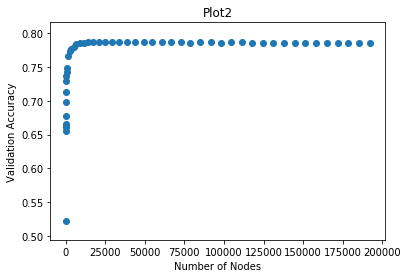

In [79]:
plt.scatter(node_count, val_acc)
plt.xlabel('Number of Nodes')
plt.ylabel('Validation Accuracy')
plt.title('Plot2')
plt.show(block=False)
# time.sleep(5)
plt.close()

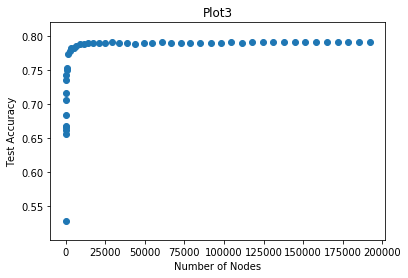

In [80]:
plt.scatter(node_count, test_acc)
plt.xlabel('Number of Nodes')
plt.ylabel('Test Accuracy')
plt.title('Plot3')
plt.show(block=False)
# time.sleep(5)
plt.close()

Accuracy is:  0.8753573470554603
Accuracy is:  0.8753573470554603
Accuracy is:  0.8753264413641773
Accuracy is:  0.8752955356728942
Accuracy is:  0.8751410072164789
Accuracy is:  0.8750482901426297
Accuracy is:  0.8748783088405729
Accuracy is:  0.8747546860754408
Accuracy is:  0.8746156104646671
Accuracy is:  0.8744919876995348
Accuracy is:  0.8743220063974781
Accuracy is:  0.8740593080215722
Accuracy is:  0.8737193454174587
Accuracy is:  0.873286665739496
Accuracy is:  0.8727149104507596
Accuracy is:  0.8721895136989477
Accuracy is:  0.8713396071886638
Accuracy is:  0.8701342852286249
Accuracy is:  0.8689753218055105
Accuracy is:  0.8676154713890563
Accuracy is:  0.8661474510531114
Accuracy is:  0.8640613168915056
Accuracy is:  0.8617124843539938
Accuracy is:  0.858745537990821
Accuracy is:  0.8562576298425355
Accuracy is:  0.8535224761639856
Accuracy is:  0.8498446989013027
Accuracy is:  0.8461514687929782
Accuracy is:  0.842906371208258
Accuracy is:  0.8387186500394047
Accuracy is: 

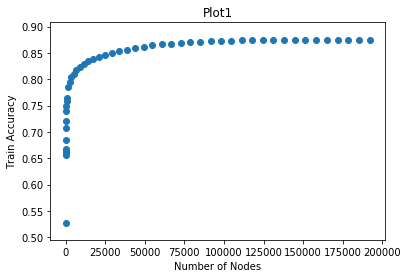

In [81]:
plt.scatter(node_count, train_acc)
plt.xlabel('Number of Nodes')
plt.ylabel('Train Accuracy')
plt.title('Plot1')
plt.show(block=False)
# time.sleep(5)
plt.close()

In [24]:
def prune_tree(dtree, Y):
    prune_list = []
    left_list = []
    right_list = []
    
#     print("Height: ", dtree.height)
    if dtree.height>1:
        tree = copy.deepcopy(dtree)
        tree.height = 1
#         case0 = 0
#         case1 = 0
#         print("Left: ", dtree.left)
        if (type(tree.left) != int):
            tree.left = tree.left.max_predict
#             for i in tree.left.i_list:
#                 if Y[i]==0:
#                     case0 += 1
#                 else:
#                     case1 += 1
#             if case0 > case1:
#                 tree.left = 0
#             else:
#                 tree.left = 1
            
#         case0 = 0
#         case1 = 0
#         print("Right: ", dtree.right)
        if (type(tree.right) != int):
            tree.right = tree.right.max_predict
#             for i in tree.right.i_list:
#                 if Y[i]==0:
#                     case0 += 1
#                 else:
#                     case1 += 1
#             if case0 > case1:
#                 tree.right = 0
#             else:
#                 tree.right = 1
       
        prune_list.append(tree)
        if (type(dtree.left) != int):
            left_list = prune_tree(dtree.left, Y)
        if (type(dtree.right) != int):
            right_list = prune_tree(dtree.right, Y)
        
        for node in left_list:
            temp = copy.deepcopy(dtree)
            temp.left = node
            if (type(temp.right) == int):
                temp.height = max(temp.left.height, 0)+1
            else:
                temp.height = max(temp.left.height, temp.right.height)+1
                prune_list.append(temp)
        
        for node in right_list:
            temp = copy.deepcopy(dtree)
            temp.right = node
            if (type(temp.left) == int):
                temp.height = max(temp.right.height, 0)+1
            else:
                temp.height = max(temp.left.height, temp.right.height)+1
            prune_list.append(temp)
        
    return prune_list

In [ ]:
#pruning using validaton set----->
prune_val_acc = []
prune_test_acc = []
prune_train_acc = []
prune_num = []
best_accuracy = get_accuracy(X_valid, Y_valid, Tree_list[0])
best_tree = copy.deepcopy(Tree_list[0])
old_accuracy = 0
count = 0
while(old_accuracy<best_accuracy):
    old_accuracy = best_accuracy
    prune_train_acc.append(get_accuracy(X_train, Y_train, best_tree))
    prune_test_acc.append(get_accuracy(X_test, Y_test, best_tree))
    prune_val_acc.append(get_accuracy(X_valid, Y_valid, best_tree))
    prune_num.append(count_node(best_tree))
    
    prune_list = prune_tree(best_tree, Y_train)
    print("Prune size: ",len(prune_list))
    for tree in prune_list:
        acc = get_accuracy(X_valid, Y_valid, tree)
        if acc>best_accuracy:
            best_accuracy = acc
            best_tree = copy.deepcopy(tree)
    count += 1
    print("Accuracy after ", count, " prunes is ", best_accuracy)
    
print("Best accuracy: ", best_accuracy)

Accuracy is:  0.7850454292601521
Accuracy is:  0.8414692565635962
Accuracy is:  0.7886977886977887
Accuracy is:  0.7850454292601521


In [25]:
print(best_tree.height)

8


In [ ]:
def prune_tree(dtree, Y):
    prune_list = []
    left_list = []
    right_list = []

    if dtree.height>1:
        tree = copy.deepcopy(dtree)
        tree.height = 1
        if (type(tree.left) != int):
            tree.left = tree.left.max_predict
        if (type(tree.right) != int):
            tree.right = tree.right.max_predict
        prune_list.append(tree)
        
        if (type(dtree.left) != int):
            left_list = prune_tree(dtree.left, Y)
        if (type(dtree.right) != int):
            right_list = prune_tree(dtree.right, Y)
        
        for node in left_list:
            temp = copy.deepcopy(dtree)
            temp.left = node
            if (type(temp.right) == int):
                temp.height = max(temp.left.height, 0)+1
            else:
                temp.height = max(temp.left.height, temp.right.height)+1
                prune_list.append(temp)
        
        for node in right_list:
            temp = copy.deepcopy(dtree)
            temp.right = node
            if (type(temp.left) == int):
                temp.height = max(temp.right.height, 0)+1
            else:
                temp.height = max(temp.left.height, temp.right.height)+1
            prune_list.append(temp)
        
    return prune_list